## Time Series Forecasting Fundamental with TensorFlow

Let's write some TensorFlow code to predict the price of Bitcoin based on the historical price of Bitcoin.

### Milestone Project 3: BitPredict

In [ ]:
!nvidia-smi

Fri Feb  3 18:00:40 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P0    32W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Get the data

We're going to be using some historical Bitcoin price data to try and predict future prices of Bitcoin. Ongoing prices are available are on CoinDesk.

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-02-03 18:00:42--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.004s  

2023-02-03 18:00:42 (42.1 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



## Importing Time Series Data

In [ ]:
import pandas as pd

# Read in and parse the dates
df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"]) # parse date column as datetime
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [ ]:
# How many samples?
len(df)

2787

In [ ]:
2787/365

7.635616438356164

We've collected the historical price of a Bitcoin over a period of 8 years, but there are only 2787 samples.

Typically deep learning model usually like lots and lots of samples (meaning tens of thousands or more, usually).

A smaller number of samples is something you'll often run into with time series data problems.

> **Note:** The *seasonality* of a time dataset is referred to as the number of samples per year. So for our Bitcoin data, it has a seasonality of daily because we collect one sample for every day of the year.

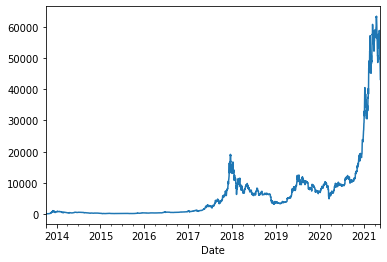

In [ ]:
df["Closing Price (USD)"].plot(kind="line")

In [ ]:
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})

In [ ]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


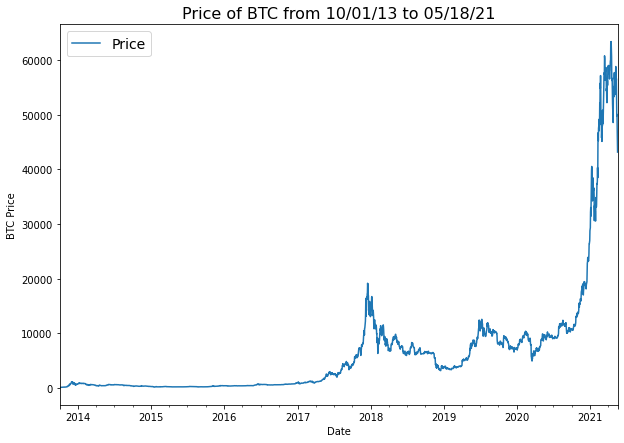

In [ ]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of BTC from 10/01/13 to 05/18/21", fontsize=16)
plt.legend(fontsize=14)

## Importing time series data with Python's CSV Module

In [ ]:
# Import and formatting historical BTC data with Python
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader) # skip first line (titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # get dates from strs
    btc_price.append(float(line[2])) # get closing price as a float

# View first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

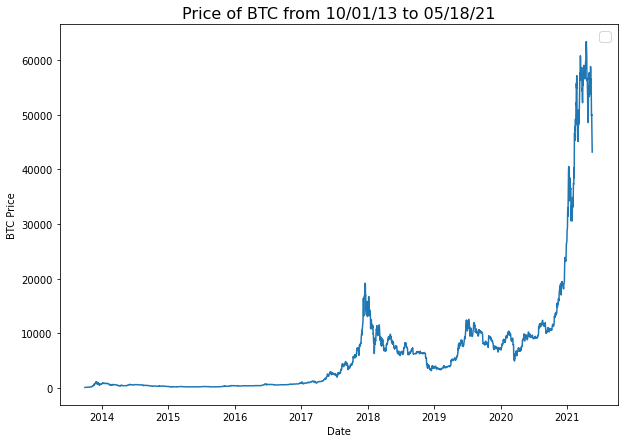

In [ ]:
# Plot from csv
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_price)
plt.ylabel("BTC Price")
plt.xlabel("Date")
plt.title("Price of BTC from 10/01/13 to 05/18/21", fontsize=16)
plt.legend(fontsize=14)

# Format data part 1: Create and train test set of our time series data

### Create train and test set with time series data (the wrong way)

In [ ]:
# Get BTC data array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [ ]:
# Wrong way to split our time series data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps,
                                                    prices,
                                                    test_size=0.2,
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

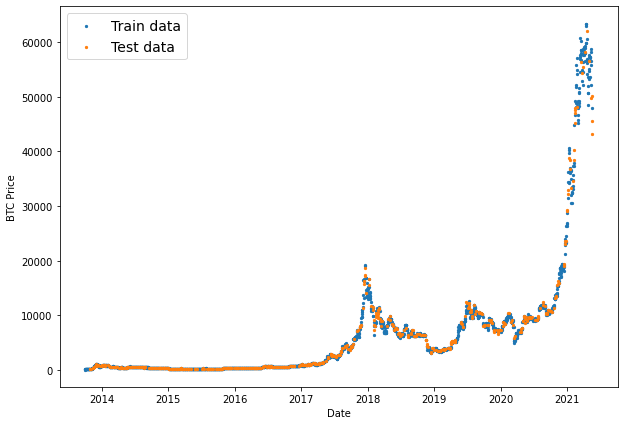

In [ ]:
# Let's plot wrong train and test splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

### Creating train-test splits for time series the *right way*

In [ ]:
split_size = int(0.8*len(prices)) # 80% train, 20% test

# Create train data splits
X_train, y_train = timesteps[:split_size], prices[:split_size]

X_test, y_test = timesteps[split_size:], prices[split_size:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

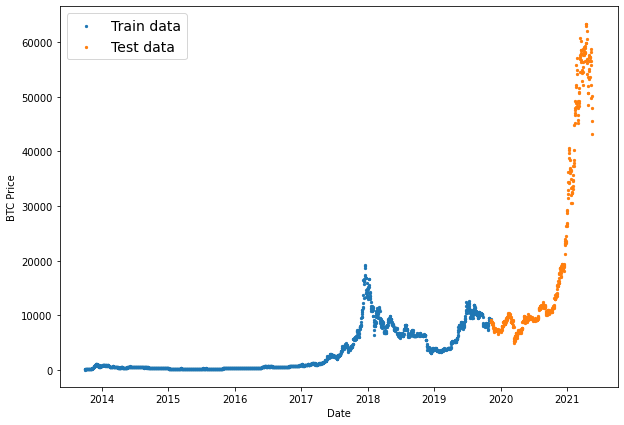

In [ ]:
# Plotting the right way
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

## Create plotting function

Typing plotting code is tedious... let's functionize it.

In [ ]:
# Create plotting function for out time series data
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  """
  Plots timesteps (a series of points in time) against values (a series of values across time).

  Parameters
  ----------
  timesteps: array of timestep values
  values: array of values across time
  format: style of plot, default "."
  start: where to start the plot (setting a value will index from start of timesteps)
  end: where to end the plot (similar to start)
  label: label to show on plot about corresponding value, default None
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

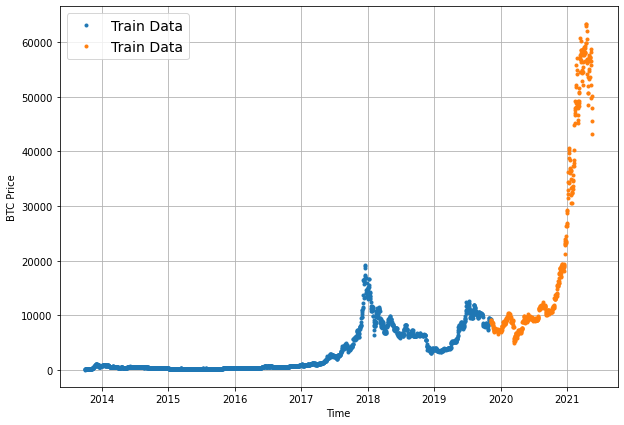

In [ ]:
# Test out plotting function
plt.figure(figsize=(10, 7))
plot_time_series(X_train, y_train, label="Train Data")
plot_time_series(X_test, y_test, label="Train Data")

## Modelling Experiments

We've got some BTC historical data. To model it, let's run a series of modelling experiments and see which model performs best.

* Model 0: Naive model (baseline)
* Model 1: Dense model (window size = 7, horizon = 1)
* Model 2: Same arch. as model 1 (window size = 30, horizon = 1)
* Model 3: Same arch. as model 1 (window size = 30, horizon = 7)
* Model 4: Conv1D
* Model 5: LSTM
* Model 6: Same as model 1 (but with *multivariate data*)
* Model 7: N-BEATS algorithm
* Model 8: Ensemble (multiple models stacked together)
* Model 9: Future prediction model
* Model 10: same as model 1 (but with *turkey data* introduced)

 ## Model 0: Naive Forecast (baseline)

The formula looks like this:

$$\hat{y}_{t} = y_{t-1}$$

In English:
> The prediction at timestep t (y-hat) is equal to the value at timestep t-1 (previous timestep) - this is for a horizon of 1.

In [ ]:
# Create a naive forecast
naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

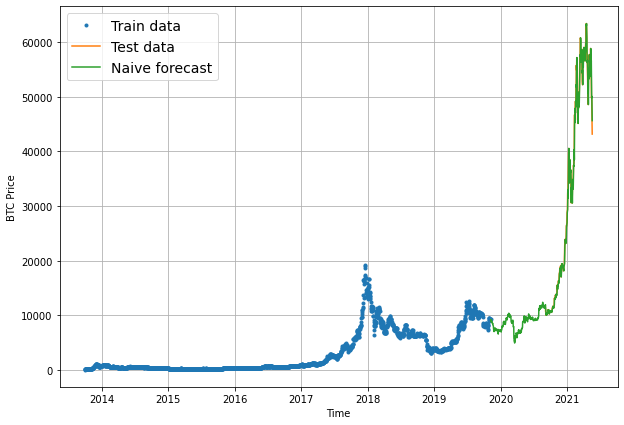

In [ ]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(X_train, y_train, label="Train data")
plot_time_series(X_test, y_test, start=300, format="-", label="Test data")
plot_time_series(X_test[1:], naive_forecast, format="-", label="Naive forecast")

**Exercise:** Read simple forecasts chapter of *Forecasting: Principles in Practice*. Search why the Naive forecast is so hard to beat... does the term **autoregressive** come up

## Evaluating a time series model

Let's look into some evaluation metrics for time series forecasting.

What are we doing?

We're predicting a number, so this will be a regression-type problem. Therefore, we'll want to consider some of the following metrics:

* Mean absolute error (MAE)
* Mean squared error (MSE)
* Root mean squared error (RMSE)
* Huber loss
* (Scaled) Mean Absolute Percentage Error (sMAPE)
* Mean absolute squared error (MASE)

For all the above metrics, **the lower the better**. For example, an MAE of 0 is better than an MAE of 100.

The main thing we're evaluating here it *how do our model's forecasts (y_pred) compare against the actual/ground truth values?*

In [ ]:
import tensorflow as tf


In [ ]:
# MASE implementation
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of a given dataset).
  """
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1]))

  return mae / mae_naive_no_season

In [ ]:
mean_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forecast).numpy()

0.9995699939182624

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)
  
  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
# Let's test out our function
naive_results = evaluate_preds(y_test[1:], naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

## Other models you can use for baselines and for actual forecasts

In this notebook, we're focused on TensorFlow and deep learning models.

However, there are plenty of other styles of time series forecasting models you may want to experiment with (see the corresponding section in the following notebook):

*https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/10_time_series_forecasting_in_tensorflow.ipynb*

For a deeper look at some forecasting in-practice and at high levels, see the following 2 links:
1. *https://github.com/facebookresearch/Kats*
2. *https://github.com/linkedin/greykite*

## Format Data Part 2: Windowing our Dataset

We window our time series dataset to turn our data into a supervised learning problem.

```
Windowing for one week
[0, 1, 2, 3, 4, 5, 6] -> [7]
[1, 2, 3, 4, 5, 6, 7] -> [8]
[2, 3, 4, 5, 6, 7, 8] -> [9]
```

In [ ]:
len(y_train)

2229

In [ ]:
btc_price[:10]

[123.65499,
 125.455,
 108.58483,
 118.67466,
 121.33866,
 120.65533,
 121.795,
 123.033,
 124.049,
 125.96116]

In [ ]:
# What we want to do with out BTC data
print(f"We want to use {btc_price[:7]}, to predict this{btc_price[7]}")

We want to use [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795], to predict this123.033


In [ ]:
# Let's setup global variables for window and horizon
HORIZON = 1 # predict one day
WINDOW_SIZE = 7 # use the past week of BTC prices to make a prediction

In [ ]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=HORIZON):
  """
  Creates labels for windowed dataset.

  E.g., if horizon = 1
  Input: [0, 1, 2, 3, 4, 5, 6, 7] -> Output: ([0, 1, 2, 3, 4, 5, 6], [7])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [ ]:
# Test out function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0))
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


We've got a way to label our windowed data.

However, this only works on a small scale.

We need a way to do the above across an entire time series...

We could do this with Python `for` loops, but for large time series that'd be quite slow.
To speed things up, we'll leverage NumPy's array indexing.

#### For practice: go through the NumPy indexing documentation at this link:
*https://numpy.org/doc/stable/reference/arrays.indexing.html*

Our function will:
1. Create a window step of specific window size (e.g. [0, 1, 2, 3, 4, 5, 6])
2. Use NumPy indexing to create a 2D array of multiple window steps. For example:

```
[[0, 1, 2, 3, 4, 5, 6],
[1, 2, 3, 4, 5, 6, 7],
[2, 3, 4, 5, 6, 7, 8]]
```
3. Uses the 2D array of multiple window steps (from 2.) to index on a target series (e.g. the historical price of BTC)
4. Uses our `get_labelled_windows()` function we created to turn the window steps into windows with a specified horizon

In [ ]:
# Create function to view NumPy arrays as windows
import numpy as np

def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  """ Turns a 1D array into a 2D array of sequential labelled windows of
  window_size with horizon size labels.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for labelling later)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size + horizon-1)), axis=0).T
  print(f"Window indexes:\n {window_indexes, window_indexes.shape}")

  # 3. Use array produced array to index on a target array (the time series)
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows (functionized above)
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)
  return windows, labels

In [ ]:
make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)

Window indexes:
 (array([[   0,    1,    2, ...,    5,    6,    7],
       [   1,    2,    3, ...,    6,    7,    8],
       [   2,    3,    4, ...,    7,    8,    9],
       ...,
       [2777, 2778, 2779, ..., 2782, 2783, 2784],
       [2778, 2779, 2780, ..., 2783, 2784, 2785],
       [2779, 2780, 2781, ..., 2784, 2785, 2786]]), (2780, 8))


(array([[  123.65499   ,   125.455     ,   108.58483   , ...,
           121.33866   ,   120.65533   ,   121.795     ],
        [  125.455     ,   108.58483   ,   118.67466   , ...,
           120.65533   ,   121.795     ,   123.033     ],
        [  108.58483   ,   118.67466   ,   121.33866   , ...,
           121.795     ,   123.033     ,   124.049     ],
        ...,
        [58788.20967893, 58102.19142623, 55715.54665129, ...,
         52147.82118698, 49764.1320816 , 50032.69313676],
        [58102.19142623, 55715.54665129, 56573.5554719 , ...,
         49764.1320816 , 50032.69313676, 47885.62525472],
        [55715.54665129, 56573.5554719 , 52147.82118698, ...,
         50032.69313676, 47885.62525472, 45604.61575361]]),
 array([[  123.033     ],
        [  124.049     ],
        [  125.96116   ],
        ...,
        [47885.62525472],
        [45604.61575361],
        [43144.47129086]]))

In [ ]:
full_windows, full_labels = make_windows(prices, WINDOW_SIZE, HORIZON)
len(full_windows), len(full_labels)

Window indexes:
 (array([[   0,    1,    2, ...,    5,    6,    7],
       [   1,    2,    3, ...,    6,    7,    8],
       [   2,    3,    4, ...,    7,    8,    9],
       ...,
       [2777, 2778, 2779, ..., 2782, 2783, 2784],
       [2778, 2779, 2780, ..., 2783, 2784, 2785],
       [2779, 2780, 2781, ..., 2784, 2785, 2786]]), (2780, 8))


(2780, 2780)

In [ ]:
# View first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label [125.96116]


In [ ]:
# View last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label [43144.47129086]


In [ ]:
prices[-1]

43144.4712908603

**Note:** you could also use the `tf.keras.preprocessing.timeseries_dataset_from_array` function to accomplish the same thing as we've coded explicitly above to produce windows and corresponding horizons.

## Turning Windows into training and test sets

In [ ]:
# Make the train_test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  
  split_size = int(len(windows) * (1-test_split)) # default to an 80-20 tr-ts split
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]

  return train_windows, test_windows, train_labels, test_labels

In [ ]:
# Create tr-ts windows with new function
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows,
                                                                                 full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [ ]:
train_windows[:5], test_windows[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
         9335.75240233, 9226.48582088, 8794.35864452],
        [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463],
        [9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
         8794.35864452, 8798.04205463, 9081.18687849],
        [9326.59962378, 9335.75240233, 9226.48582088, 8794.35864452,
         8798.04205463, 9081.18687849, 8711.53433917],
        [9335.75240233

In [ ]:
# Check to see if train labels are the same (before and after window split)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

## Make a Modelling Checkpoint Callback

Because our model's performance will fluctuate from experiment to experiment, we're going to write a model checkpoint so we can compare apples to apples.

More specifically, we want to compare each of our models' best performances against the other models' best performances.

For example: if our model performs the best on epoch 55 (but we're training over 100 epochs), we want to be able to load and evaluate the model saved on epoch 55.


In [ ]:
# Create modelling checkpoint to save the best model during training
import os

# Create a function to implement a ModelCheckpoint cb with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path,
                                                                  model_name),
                                            monitor="val_loss",
                                            verbose=0, # limit output
                                            save_best_only=True)

## Model 1: Dense model (window = 7, horizon = 1)

Our first deep model is going to be a simple Dense model:
* A single dense layer with 128 hidden units and ReLU activation
* An output layer with linear activation (no activation)
* Adam optimization and MAE loss function
* Batch size of 128 (previously we've used 32)
* 100 epochs

Why these values?

These were picked as a result of past experimentation and what has worked out well in the past.

* **Hyperparameters** = values a machine learning practitioner can adjust on their own
* **Parameters** = values a model learns on its own

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for reproducible results as possible
tf.random.set_seed(42)

# Construct model sequentially
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear")
], name="model_1_dense")

# Compile
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

# Fit the model
history_model_1 = model_1.fit(train_windows, train_labels, epochs=100,
                              verbose=1, batch_size=128,
                              validation_data=(test_windows, test_labels),
                              callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
18/18 [==============================] - 3s 42ms/step - loss: 780.3455 - mae: 780.3455 - mse: 2312725.7500 - val_loss: 2279.6528 - val_mae: 2279.6528 - val_mse: 12772731.0000
Epoch 2/100
18/18 [==============================] - 0s 26ms/step - loss: 247.6756 - mae: 247.6756 - mse: 285481.1875 - val_loss: 1005.9993 - val_mae: 1005.9993 - val_mse: 3441833.2500
Epoch 3/100
18/18 [==============================] - 0s 25ms/step - loss: 188.4116 - mae: 188.4116 - mse: 171891.6094 - val_loss: 923.2862 - val_mae: 923.2861 - val_mse: 2868220.7500
Epoch 4/100
18/18 [==============================] - 0s 27ms/step - loss: 169.4340 - mae: 169.4340 - mse: 151700.5781 - val_loss: 900.5872 - val_mae: 900.5872 - val_mse: 2683715.5000
Epoch 5/100
18/18 [==============================] - 0s 25ms/step - loss: 165.0894 - mae: 165.0894 - mse: 145490.7812 - val_loss: 895.2237 - val_mae: 895.2237 - val_mse: 2564574.5000
Epoch 6/100
18/18 [==============================] - 0s 26ms/step - loss: 158.5

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [ ]:
# Evaluate on test data
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 585.9758 - mae: 585.9758 - mse: 1197802.1250


[585.9757690429688, 585.9757690429688, 1197802.125]

In [ ]:
model_1 = tf.keras.models.load_model("/content/model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 568.9510 - mae: 568.9510 - mse: 1171743.6250


[568.9510498046875, 568.9510498046875, 1171743.625]

## Making forecasts with a model (on the test dataset)

To make "forecasts" on the test dataset (note: these won't be *real* forecasts, as they're only pseudo forecasts because actual forecasts are into the future), let's write a function to:

1. Take in a train model
2. Take in some input data (same kind of data model was trained on
3. Passes the input data to the model's `predict()` method
4. Return the predictions

In [ ]:
def make_preds(model, input_data):
  """
  Uses model to make predictions on input_data
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [ ]:
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 2ms/step


(556, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8861.71 , 8769.887, 9015.711, 8795.519, 8723.811, 8730.111,
        8691.952, 8502.054, 8460.961, 8516.548], dtype=float32)>)

In [ ]:
tf.squeeze(test_labels)

# Evaluate preds
model_1_results = evaluate_preds(tf.squeeze(test_labels), model_1_preds)
model_1_results

{'mae': 568.95105,
 'mse': 1171743.8,
 'rmse': 1082.4711,
 'mape': 2.5448983,
 'mase': 0.9994894}

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

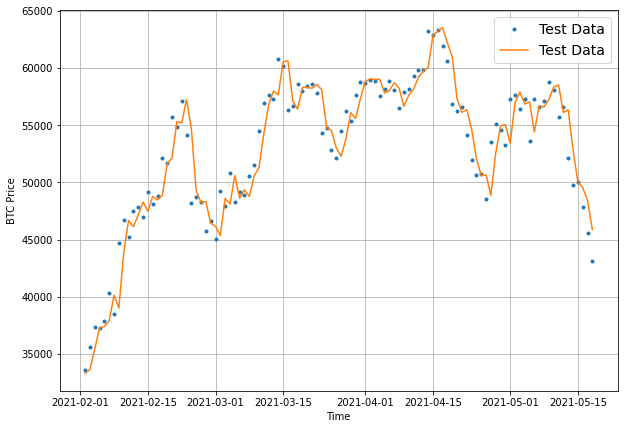

In [ ]:
# Let's plot our results
offset = 450
plt.figure(figsize=(10, 7))

# Acount for the test window offest and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label="Test Data")

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_1_preds,
                 start=offset,
                 format="-",
                 label="Test Data")

## Model 2: Dense (window = 30, horizon = 1)

In [ ]:
# Reset global variables to fit our experiment
HORIZON = 1
WINDOW_SIZE = 30

In [ ]:
# Make window data data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, 
                                         window_size=WINDOW_SIZE,
                                         horizon=HORIZON)
len(full_windows), len(full_labels)

Window indexes:
 (array([[   0,    1,    2, ...,   28,   29,   30],
       [   1,    2,    3, ...,   29,   30,   31],
       [   2,    3,    4, ...,   30,   31,   32],
       ...,
       [2754, 2755, 2756, ..., 2782, 2783, 2784],
       [2755, 2756, 2757, ..., 2783, 2784, 2785],
       [2756, 2757, 2758, ..., 2784, 2785, 2786]]), (2757, 31))


(2757, 2757)

In [ ]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [ ]:
train_windows[:3], train_labels[:3]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
         126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
         152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
         180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
         135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
         160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
         175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
         133.20333, 142.76333, 137.92333, 142.95166, 152.55183, 160.33883,
         164.31499, 177

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear")
], name="model_2_dense")

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

history_model_2 = model_2.fit(train_windows, train_labels, epochs=100, batch_size=128,
            validation_data=(test_windows, test_labels),
            verbose=True,
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

Epoch 1/100
18/18 [==============================] - 1s 33ms/step - loss: 1097.0399 - mae: 1097.0399 - mse: 4741506.0000 - val_loss: 3900.2537 - val_mae: 3900.2537 - val_mse: 32752730.0000
Epoch 2/100
18/18 [==============================] - 0s 27ms/step - loss: 428.0732 - mae: 428.0732 - mse: 811548.2500 - val_loss: 1587.0745 - val_mae: 1587.0745 - val_mse: 6817661.5000
Epoch 3/100
18/18 [==============================] - 0s 27ms/step - loss: 279.7655 - mae: 279.7655 - mse: 363083.0625 - val_loss: 1220.6888 - val_mae: 1220.6888 - val_mse: 4447002.0000
Epoch 4/100
18/18 [==============================] - 0s 27ms/step - loss: 224.3637 - mae: 224.3637 - mse: 225072.2188 - val_loss: 1160.1572 - val_mae: 1160.1572 - val_mse: 3837504.2500
Epoch 5/100
18/18 [==============================] - 0s 26ms/step - loss: 187.9681 - mae: 187.9681 - mse: 173777.0312 - val_loss: 1007.6487 - val_mae: 1007.6487 - val_mse: 3224229.0000
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss

In [ ]:
# Evaluate on test data
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 659.3332 - mae: 659.3332 - mse: 1397247.7500


[659.3331909179688, 659.3331909179688, 1397247.75]

In [ ]:
# Load in the best performing model
model_2 = tf.keras.models.load_model("/content/model_experiments/model_2_dense")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 605.8741 - mae: 605.8741 - mse: 1273360.7500


[605.8740844726562, 605.8740844726562, 1273360.75]

In [ ]:
# Get forecast predictions
model_2_preds = make_preds(model_2, test_windows)

18/18 [==============================] - 0s 1ms/step


In [ ]:
model_2_results = evaluate_preds(tf.squeeze(test_labels), model_2_preds)
model_2_results

{'mae': 605.8741,
 'mse': 1273360.8,
 'rmse': 1128.4329,
 'mape': 2.726445,
 'mase': 1.0590738}

In [ ]:
# Evaluate preds
model_2_results = evaluate_preds(tf.squeeze(test_labels), model_2_preds)
model_2_results

{'mae': 605.8741,
 'mse': 1273360.8,
 'rmse': 1128.4329,
 'mape': 2.726445,
 'mase': 1.0590738}

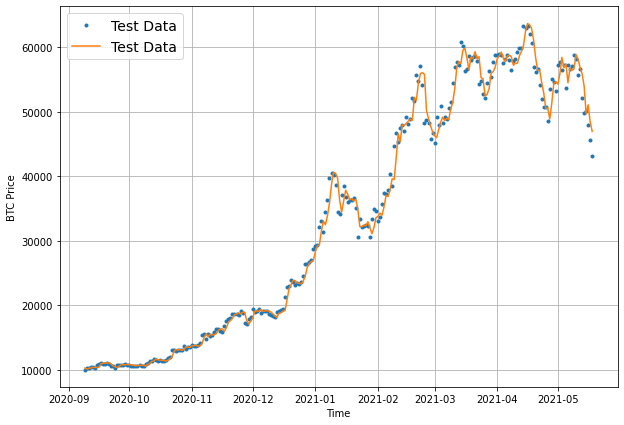

In [ ]:
# Let's plot our results (WRONG)
offset = 300
plt.figure(figsize=(10, 7))

# Acount for the test window offest and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label="Test Data")

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_2_preds,
                 start=offset,
                 format="-",
                 label="Test Data")

## Model 3: Dense (window = 30, horizon = 7)

In [ ]:
# Change global variables again
WINDOW_SIZE = 30
HORIZON = 7

In [ ]:
full_windows, full_labels = make_windows(prices, WINDOW_SIZE, HORIZON)
len(full_windows), len(full_labels)

Window indexes:
 (array([[   0,    1,    2, ...,   34,   35,   36],
       [   1,    2,    3, ...,   35,   36,   37],
       [   2,    3,    4, ...,   36,   37,   38],
       ...,
       [2748, 2749, 2750, ..., 2782, 2783, 2784],
       [2749, 2750, 2751, ..., 2783, 2784, 2785],
       [2750, 2751, 2752, ..., 2784, 2785, 2786]]), (2751, 37))


(2751, 2751)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [ ]:
# Create model 3
model_3 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear")
], name="model_3_dense")

# Compile
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

# Fit
history_model_3 = model_3.fit(train_windows, train_labels, epochs=100,
                              batch_size=128,
                              validation_data=(test_windows, test_labels),
                              verbose=True,
                              callbacks=[create_model_checkpoint(model_name=model_3.name)])

Epoch 1/100
18/18 [==============================] - 2s 83ms/step - loss: 1755.8939 - mae: 1755.8939 - mse: 13708834.0000 - val_loss: 3986.9456 - val_mae: 3986.9456 - val_mse: 54289792.0000
Epoch 2/100
18/18 [==============================] - 1s 35ms/step - loss: 550.2391 - mae: 550.2391 - mse: 1330859.6250 - val_loss: 2158.2322 - val_mae: 2158.2322 - val_mse: 12997529.0000
Epoch 3/100
18/18 [==============================] - 1s 39ms/step - loss: 415.7840 - mae: 415.7840 - mse: 825040.1875 - val_loss: 2030.4072 - val_mae: 2030.4072 - val_mse: 12232812.0000
Epoch 4/100
18/18 [==============================] - 0s 28ms/step - loss: 379.9277 - mae: 379.9277 - mse: 701433.5625 - val_loss: 1933.2146 - val_mae: 1933.2146 - val_mse: 11123688.0000
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 355.7990 - mae: 355.7990 - mse: 617779.1250 - val_loss: 1962.0751 - val_mae: 1962.0751 - val_mse: 11232692.0000
Epoch 6/100
18/18 [==============================] - 0s 27ms/step 

In [ ]:
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1325.4447 - mae: 1325.4447 - mse: 5694108.5000


[1325.4447021484375, 1325.4447021484375, 5694108.5]

In [ ]:
model_3 = tf.keras.models.load_model("/content/model_experiments/model_3_dense")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1237.3538 - mae: 1237.3538 - mse: 5384458.0000


[1237.353759765625, 1237.353759765625, 5384458.0]

In [ ]:
model_3_preds = make_preds(model_3, test_windows)
model_3_preds[:5]

18/18 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9441.6455, 9235.19  , 9462.217 , 9579.701 , 9424.109 , 9601.962 ,
        9409.673 ],
       [9144.572 , 8923.401 , 9070.582 , 9321.713 , 9230.483 , 9302.237 ,
        9155.381 ],
       [8923.3545, 8758.443 , 8893.445 , 9062.647 , 9047.848 , 9041.655 ,
        8874.882 ],
       [9079.228 , 9027.673 , 9285.773 , 9396.787 , 9411.149 , 9354.607 ,
        9113.59  ],
       [8881.    , 8903.381 , 9159.7   , 9242.96  , 9385.533 , 9185.6   ,
        8902.385 ]], dtype=float32)>

In [ ]:
# Evaluate model_3 results
model_3_results = evaluate_preds(tf.squeeze(test_labels), model_3_preds)
model_3_results

{'mae': array([  657.4276  ,   457.87863 ,   283.99008 ,   611.8065  ,
          540.0177  ,   465.58392 ,   493.60938 ,   549.52936 ,
          565.07416 ,   594.1546  ,   689.091   ,   750.6047  ,
          860.7916  ,   862.76514 ,   708.5846  ,   372.15994 ,
          200.82498 ,   237.5272  ,   220.10951 ,   231.8637  ,
          206.10805 ,   202.46819 ,   395.08844 ,   300.51645 ,
          238.20662 ,   106.7613  ,    84.7989  ,   112.84612 ,
          133.35582 ,   194.76562 ,   290.0754  ,   283.96408 ,
          354.47195 ,   292.21262 ,   343.17307 ,   269.80844 ,
          290.2793  ,   292.598   ,   222.0761  ,   217.86607 ,
          401.45285 ,    77.25028 ,   117.99142 ,   121.839005,
           86.786415,   134.73744 ,    80.98347 ,   158.84543 ,
           82.924385,    87.86293 ,   187.8863  ,   183.3358  ,
          125.56954 ,   243.78543 ,   229.51828 ,   361.4905  ,
          500.4795  ,   442.49603 ,   473.02603 ,   560.3837  ,
          327.01416 ,   197.44922

## Make our `evaluate_preds()` function work for larger horizons

In [ ]:
model_2_results["mae"].ndim

0

In [ ]:
model_3_results["mae"].ndim

1

In [ ]:
# Use comparison operator to carry out logic depending on metric shape
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)
  
  # Account for different sized metrics (for longer horizons, reduce metrics to single value)
  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
# Get model_3 results aggregated to single values
model_3_results = evaluate_preds(tf.squeeze(test_labels), model_3_preds)
model_3_results

{'mae': 1237.3538,
 'mse': 5384457.5,
 'rmse': 1421.6086,
 'mape': 5.564616,
 'mase': 2.2018018}

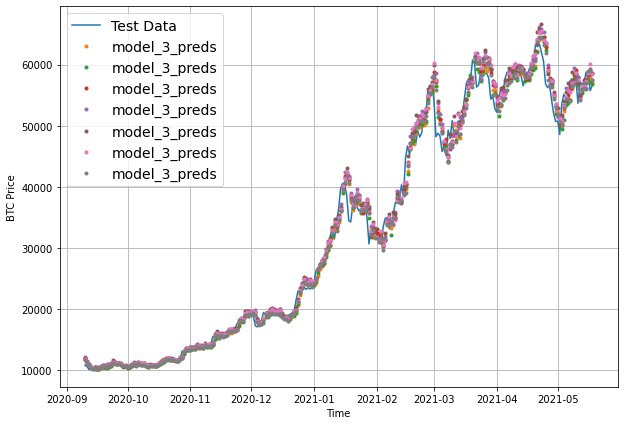

In [ ]:
# Replot our results after reducing results to single variable
offset = 300
plt.figure(figsize=(10, 7))

# Acount for the test window offest and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 format="-",
                 label="Test Data")

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_3_preds,
                 start=offset,
                 format=".",
                 label="model_3_preds")

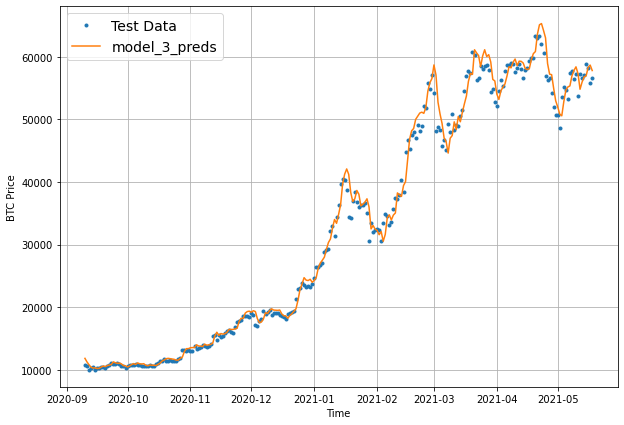

In [ ]:
# Reduce mean of preds
offset = 300
plt.figure(figsize=(10, 7))

# Acount for the test window offest and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 format=".",
                 label="Test Data")

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=tf.reduce_mean(model_3_preds, axis=1),
                 start=offset,
                 format="-",
                 label="model_3_preds")

>**Remember**: by calling `tf.reduce_mean()` to not overload our visual representation, we do *lose* some accuracy because the data's actual format is originally an array of length 7, but we've forced it into different format. Though the visuals may be helpful, knowing that this method is not 100% accurate is important - it is just helpful to monitor performance metrics as we iterate models.

## Plotting the performance of our models so far... (bar graph)

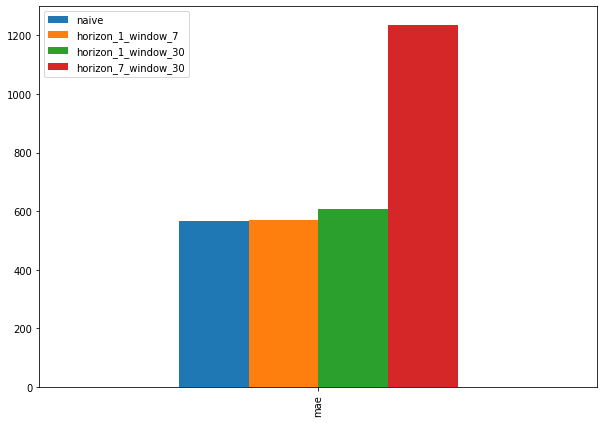

In [ ]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]},
             index=["mae"]).plot(kind="bar", figsize=(10, 7));

**See Wikipedia on** *autocorrelation* **for some helpful info on the nature of time series and their fot-inherent self-similarity:**  *https://en.wikipedia.org/wiki/Autocorrelation#:~:text=Autocorrelation%2C%20sometimes%20known%20as%20serial,the%20time%20lag%20between%20them.*

## Model 4: Conv1D (first Sequence model of this set)

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
full_windows, full_labels = make_windows(prices, WINDOW_SIZE, HORIZON)
len(full_windows), len(full_labels)

Window indexes:
 (array([[   0,    1,    2, ...,    5,    6,    7],
       [   1,    2,    3, ...,    6,    7,    8],
       [   2,    3,    4, ...,    7,    8,    9],
       ...,
       [2777, 2778, 2779, ..., 2782, 2783, 2784],
       [2778, 2779, 2780, ..., 2783, 2784, 2785],
       [2779, 2780, 2781, ..., 2784, 2785, 2786]]), (2780, 8))


(2780, 2780)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

To use the Conv1D layer, we need an input shape of `(batch_size, timesteps, input_dim)` - but our data isn't in that shape yet...

*https://www.tensorflow.org/tutorials/structured_data/time_series*

In [ ]:
# Check the data input shape
train_windows[0].shape

(7,)

In [ ]:
# Reshape data to make sure it works before passing off to Conv1D layer
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [ ]:
# add extra dimension 
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))

In [ ]:
# test lambda layer
print(f"Original shape: {x.shape}") # WINDOW_SIZE
print(f"Expanded shape: {expand_dims_layer(x).shape}") # output = ...?
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [ ]:
x.numpy()

array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])

In [ ]:
# Creat Convd1D
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    expand_dims_layer,
    layers.Conv1D(filters=128, 
                  kernel_size=5,
                  padding="causal",
                  activation="relu"),
    layers.Dense(HORIZON)
], name="model_4_conv1d")

model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

history_model_4 = model_4.fit(train_windows, train_labels, epochs=100,
                              batch_size=128,
                              validation_data=(test_windows, test_labels),
                              verbose=True,
                              callbacks=[create_model_checkpoint(model_name=model_4.name)])

Epoch 1/100
13/18 [====================>.........] - ETA: 0s - loss: 1530.3120 - mae: 1530.3120 - mse: 6784216.0000   

18/18 [==============================] - 7s 83ms/step - loss: 1207.3817 - mae: 1207.3817 - mse: 5128398.0000 - val_loss: 2320.6218 - val_mae: 2320.6218 - val_mse: 13063541.0000
Epoch 2/100
12/18 [===================>..........] - ETA: 0s - loss: 349.6689 - mae: 349.6689 - mse: 499702.1250

18/18 [==============================] - 1s 73ms/step - loss: 316.2171 - mae: 316.2171 - mse: 408753.9375 - val_loss: 1467.2799 - val_mae: 1467.2799 - val_mse: 5375009.5000
Epoch 3/100
15/18 [========================>.....] - ETA: 0s - loss: 195.7219 - mae: 195.7219 - mse: 190615.7812

18/18 [==============================] - 1s 72ms/step - loss: 192.6853 - mae: 192.6853 - mse: 187429.8281 - val_loss: 1164.7074 - val_mae: 1164.7074 - val_mse: 3801948.0000
Epoch 4/100
16/18 [=========================>....] - ETA: 0s - loss: 177.6876 - mae: 177.6876 - mse: 168237.6875

18/18 [==============================] - 1s 75ms/step - loss: 177.3535 - mae: 177.3535 - mse: 166088.1562 - val_loss: 981.6695 - val_mae: 981.6695 - val_mse: 3154571.5000
Epoch 5/100
18/18 [==============================] - ETA: 0s - loss: 172.3467 - mae: 172.3467 - mse: 159527.5469

18/18 [==============================] - 2s 101ms/step - loss: 172.3467 - mae: 172.3467 - mse: 159527.5469 - val_loss: 960.8708 - val_mae: 960.8708 - val_mse: 3055978.0000
Epoch 6/100
17/18 [===========================>..] - ETA: 0s - loss: 170.2479 - mae: 170.2479 - mse: 146161.0781

18/18 [==============================] - 1s 68ms/step - loss: 171.9753 - mae: 171.9753 - mse: 156367.9844 - val_loss: 950.2026 - val_mae: 950.2026 - val_mse: 3054649.0000
Epoch 7/100
18/18 [==============================] - ETA: 0s - loss: 167.1943 - mae: 167.1943 - mse: 149199.9531

18/18 [==============================] - 1s 61ms/step - loss: 167.1943 - mae: 167.1943 - mse: 149199.9531 - val_loss: 943.2872 - val_mae: 943.2872 - val_mse: 2886476.2500
Epoch 8/100
18/18 [==============================] - ETA: 0s - loss: 163.5990 - mae: 163.5990 - mse: 144668.8438

18/18 [==============================] - 1s 62ms/step - loss: 163.5990 - mae: 163.5990 - mse: 144668.8438 - val_loss: 905.5262 - val_mae: 905.5262 - val_mse: 2758449.7500
Epoch 9/100
18/18 [==============================] - 0s 8ms/step - loss: 162.5455 - mae: 162.5455 - mse: 142410.2344 - val_loss: 929.7607 - val_mae: 929.7607 - val_mse: 2723885.0000
Epoch 10/100
 9/18 [==============>...............] - ETA: 0s - loss: 154.5877 - mae: 154.5877 - mse: 127802.2812

18/18 [==============================] - 1s 61ms/step - loss: 158.5780 - mae: 158.5780 - mse: 137094.5781 - val_loss: 871.9778 - val_mae: 871.9778 - val_mse: 2543123.0000
Epoch 11/100
10/18 [===============>..............] - ETA: 0s - loss: 154.8821 - mae: 154.8821 - mse: 138484.2812

18/18 [==============================] - 1s 51ms/step - loss: 154.0058 - mae: 154.0058 - mse: 129600.4766 - val_loss: 852.7120 - val_mae: 852.7120 - val_mse: 2436986.2500
Epoch 12/100
18/18 [==============================] - 0s 7ms/step - loss: 151.2620 - mae: 151.2620 - mse: 124661.1328 - val_loss: 944.1970 - val_mae: 944.1970 - val_mse: 2601012.2500
Epoch 13/100
18/18 [==============================] - 0s 6ms/step - loss: 150.2688 - mae: 150.2688 - mse: 125091.0625 - val_loss: 881.1826 - val_mae: 881.1826 - val_mse: 2375321.2500
Epoch 14/100
17/18 [===========================>..] - ETA: 0s - loss: 142.4802 - mae: 142.4802 - mse: 110891.2656

18/18 [==============================] - 1s 52ms/step - loss: 145.4593 - mae: 145.4593 - mse: 116202.5312 - val_loss: 849.1818 - val_mae: 849.1818 - val_mse: 2246609.2500
Epoch 15/100
17/18 [===========================>..] - ETA: 0s - loss: 143.3098 - mae: 143.3098 - mse: 114004.1797

18/18 [==============================] - 1s 63ms/step - loss: 143.3640 - mae: 143.3640 - mse: 113840.8594 - val_loss: 844.4007 - val_mae: 844.4007 - val_mse: 2190368.2500
Epoch 16/100
15/18 [========================>.....] - ETA: 0s - loss: 139.3140 - mae: 139.3140 - mse: 105761.0391

18/18 [==============================] - 1s 38ms/step - loss: 139.8764 - mae: 139.8764 - mse: 109100.1953 - val_loss: 806.7261 - val_mae: 806.7261 - val_mse: 2055003.3750
Epoch 17/100
18/18 [==============================] - 0s 5ms/step - loss: 138.1677 - mae: 138.1677 - mse: 104690.9531 - val_loss: 812.6340 - val_mae: 812.6340 - val_mse: 2030382.7500
Epoch 18/100
17/18 [===========================>..] - ETA: 0s - loss: 139.1615 - mae: 139.1615 - mse: 107938.3828

18/18 [==============================] - 1s 39ms/step - loss: 137.9497 - mae: 137.9497 - mse: 106266.0078 - val_loss: 775.2100 - val_mae: 775.2100 - val_mse: 1904604.6250
Epoch 19/100
18/18 [==============================] - ETA: 0s - loss: 131.1450 - mae: 131.1450 - mse: 97691.8906

18/18 [==============================] - 1s 53ms/step - loss: 131.1450 - mae: 131.1450 - mse: 97691.8906 - val_loss: 755.4260 - val_mae: 755.4260 - val_mse: 1826982.1250
Epoch 20/100
18/18 [==============================] - ETA: 0s - loss: 132.4057 - mae: 132.4057 - mse: 99905.6719 

18/18 [==============================] - 1s 40ms/step - loss: 132.4057 - mae: 132.4057 - mse: 99905.6719 - val_loss: 712.2014 - val_mae: 712.2014 - val_mse: 1729327.0000
Epoch 21/100
17/18 [===========================>..] - ETA: 0s - loss: 130.0737 - mae: 130.0737 - mse: 93090.5859 

18/18 [==============================] - 1s 37ms/step - loss: 131.0829 - mae: 131.0829 - mse: 97808.9531 - val_loss: 707.4122 - val_mae: 707.4122 - val_mse: 1665285.6250
Epoch 22/100
18/18 [==============================] - ETA: 0s - loss: 126.9511 - mae: 126.9511 - mse: 92542.6797 

18/18 [==============================] - 1s 37ms/step - loss: 126.9511 - mae: 126.9511 - mse: 92542.6797 - val_loss: 692.9736 - val_mae: 692.9736 - val_mse: 1612671.2500
Epoch 23/100
18/18 [==============================] - ETA: 0s - loss: 125.1489 - mae: 125.1489 - mse: 89912.6797

18/18 [==============================] - 1s 41ms/step - loss: 125.1489 - mae: 125.1489 - mse: 89912.6797 - val_loss: 682.4753 - val_mae: 682.4753 - val_mse: 1570821.5000
Epoch 24/100
15/18 [========================>.....] - ETA: 0s - loss: 124.9378 - mae: 124.9378 - mse: 91102.6484

18/18 [==============================] - 1s 67ms/step - loss: 124.3786 - mae: 124.3786 - mse: 88815.1328 - val_loss: 670.8320 - val_mae: 670.8320 - val_mse: 1547312.1250
Epoch 25/100
17/18 [===========================>..] - ETA: 0s - loss: 122.1697 - mae: 122.1697 - mse: 86033.5703

18/18 [==============================] - 1s 53ms/step - loss: 121.6896 - mae: 121.6896 - mse: 85134.2266 - val_loss: 662.6083 - val_mae: 662.6083 - val_mse: 1515859.3750
Epoch 26/100
17/18 [===========================>..] - ETA: 0s - loss: 121.2305 - mae: 121.2305 - mse: 80895.3203

18/18 [==============================] - 1s 47ms/step - loss: 121.5705 - mae: 121.5705 - mse: 84747.4922 - val_loss: 654.6090 - val_mae: 654.6090 - val_mse: 1471183.1250
Epoch 27/100
15/18 [========================>.....] - ETA: 0s - loss: 122.8049 - mae: 122.8049 - mse: 82690.3047 

18/18 [==============================] - 1s 58ms/step - loss: 122.6445 - mae: 122.6445 - mse: 84560.6562 - val_loss: 650.9058 - val_mae: 650.9058 - val_mse: 1442083.0000
Epoch 28/100
14/18 [======================>.......] - ETA: 0s - loss: 115.2982 - mae: 115.2982 - mse: 74717.2969

18/18 [==============================] - 1s 47ms/step - loss: 117.9562 - mae: 117.9562 - mse: 81453.9219 - val_loss: 645.4808 - val_mae: 645.4808 - val_mse: 1420867.6250
Epoch 29/100
18/18 [==============================] - ETA: 0s - loss: 117.1769 - mae: 117.1769 - mse: 80815.1797

18/18 [==============================] - 1s 55ms/step - loss: 117.1769 - mae: 117.1769 - mse: 80815.1797 - val_loss: 639.9748 - val_mae: 639.9748 - val_mse: 1400477.7500
Epoch 30/100
10/18 [===============>..............] - ETA: 0s - loss: 113.3276 - mae: 113.3276 - mse: 71042.4219

18/18 [==============================] - 2s 90ms/step - loss: 121.0468 - mae: 121.0468 - mse: 82429.1094 - val_loss: 630.7950 - val_mae: 630.7950 - val_mse: 1388349.3750
Epoch 31/100
18/18 [==============================] - 0s 11ms/step - loss: 114.9061 - mae: 114.9061 - mse: 78196.6953 - val_loss: 652.6464 - val_mae: 652.6464 - val_mse: 1413817.7500
Epoch 32/100
14/18 [======================>.......] - ETA: 0s - loss: 119.1011 - mae: 119.1011 - mse: 84220.2344

18/18 [==============================] - 1s 86ms/step - loss: 116.4313 - mae: 116.4313 - mse: 81174.0234 - val_loss: 623.4980 - val_mae: 623.4980 - val_mse: 1350015.8750
Epoch 33/100
18/18 [==============================] - 0s 15ms/step - loss: 115.7972 - mae: 115.7972 - mse: 78665.5938 - val_loss: 664.3209 - val_mae: 664.3209 - val_mse: 1430615.8750
Epoch 34/100
14/18 [======================>.......] - ETA: 0s - loss: 120.3016 - mae: 120.3016 - mse: 88759.4453 

18/18 [==============================] - 1s 57ms/step - loss: 117.2043 - mae: 117.2043 - mse: 80827.8750 - val_loss: 613.7654 - val_mae: 613.7654 - val_mse: 1334183.3750
Epoch 35/100
18/18 [==============================] - 0s 5ms/step - loss: 113.4074 - mae: 113.4074 - mse: 78210.3125 - val_loss: 619.6227 - val_mae: 619.6227 - val_mse: 1348779.8750
Epoch 36/100
12/18 [===================>..........] - ETA: 0s - loss: 113.9046 - mae: 113.9046 - mse: 79983.6172 

18/18 [==============================] - 1s 64ms/step - loss: 116.8330 - mae: 116.8330 - mse: 78300.6875 - val_loss: 605.7616 - val_mae: 605.7616 - val_mse: 1305431.5000
Epoch 37/100
14/18 [======================>.......] - ETA: 0s - loss: 116.3824 - mae: 116.3824 - mse: 80757.8047 

18/18 [==============================] - 1s 50ms/step - loss: 114.7925 - mae: 114.7925 - mse: 79040.6562 - val_loss: 603.6094 - val_mae: 603.6094 - val_mse: 1294560.0000
Epoch 38/100
16/18 [=========================>....] - ETA: 0s - loss: 113.1984 - mae: 113.1984 - mse: 76833.3984

18/18 [==============================] - 1s 51ms/step - loss: 113.0861 - mae: 113.0861 - mse: 77563.4375 - val_loss: 602.5891 - val_mae: 602.5891 - val_mse: 1295688.1250
Epoch 39/100
10/18 [===============>..............] - ETA: 0s - loss: 115.8286 - mae: 115.8286 - mse: 84510.6328 

18/18 [==============================] - 1s 63ms/step - loss: 111.9831 - mae: 111.9831 - mse: 75947.3672 - val_loss: 602.2945 - val_mae: 602.2945 - val_mse: 1280478.1250
Epoch 40/100
16/18 [=========================>....] - ETA: 0s - loss: 111.4864 - mae: 111.4864 - mse: 76626.8672

18/18 [==============================] - 1s 53ms/step - loss: 111.2691 - mae: 111.2691 - mse: 74966.6172 - val_loss: 600.5515 - val_mae: 600.5515 - val_mse: 1286574.0000
Epoch 41/100
18/18 [==============================] - 0s 8ms/step - loss: 112.0727 - mae: 112.0727 - mse: 76083.7734 - val_loss: 623.0615 - val_mae: 623.0615 - val_mse: 1344014.5000
Epoch 42/100
18/18 [==============================] - 0s 9ms/step - loss: 116.7095 - mae: 116.7095 - mse: 79633.6172 - val_loss: 645.0155 - val_mae: 645.0155 - val_mse: 1360183.7500
Epoch 43/100
18/18 [==============================] - 0s 6ms/step - loss: 118.9676 - mae: 118.9676 - mse: 76665.8672 - val_loss: 659.5667 - val_mae: 659.5667 - val_mse: 1435150.0000
Epoch 44/100
18/18 [==============================] - 0s 6ms/step - loss: 125.4497 - mae: 125.4497 - mse: 84966.2109 - val_loss: 678.8228 - val_mae: 678.8228 - val_mse: 1486618.5000
Epoch 45/100
18/18 [==============================] - 0s 6ms/step - loss: 115.4361 - mae: 115.4361 - m

18/18 [==============================] - 1s 47ms/step - loss: 114.1717 - mae: 114.1717 - mse: 75834.5469 - val_loss: 589.6738 - val_mae: 589.6738 - val_mse: 1249182.1250
Epoch 47/100
18/18 [==============================] - 0s 6ms/step - loss: 113.7248 - mae: 113.7248 - mse: 77126.5000 - val_loss: 720.2481 - val_mae: 720.2481 - val_mse: 1539007.0000
Epoch 48/100
18/18 [==============================] - 0s 8ms/step - loss: 112.0136 - mae: 112.0136 - mse: 74307.4766 - val_loss: 597.4332 - val_mae: 597.4332 - val_mse: 1251159.2500
Epoch 49/100
18/18 [==============================] - 0s 6ms/step - loss: 110.5680 - mae: 110.5680 - mse: 74564.1094 - val_loss: 665.2030 - val_mae: 665.2030 - val_mse: 1391443.2500
Epoch 50/100
18/18 [==============================] - 0s 5ms/step - loss: 119.7653 - mae: 119.7653 - mse: 78599.2812 - val_loss: 635.1696 - val_mae: 635.1696 - val_mse: 1326078.8750
Epoch 51/100
17/18 [===========================>..] - ETA: 0s - loss: 111.1653 - mae: 111.1653 - mse: 

18/18 [==============================] - 1s 49ms/step - loss: 110.7739 - mae: 110.7739 - mse: 72887.1484 - val_loss: 586.0245 - val_mae: 586.0245 - val_mse: 1230914.5000
Epoch 52/100
18/18 [==============================] - 0s 6ms/step - loss: 111.2179 - mae: 111.2179 - mse: 75390.1172 - val_loss: 595.2483 - val_mae: 595.2483 - val_mse: 1259352.8750
Epoch 53/100
18/18 [==============================] - 0s 5ms/step - loss: 113.6466 - mae: 113.6466 - mse: 75888.1406 - val_loss: 670.5778 - val_mae: 670.5778 - val_mse: 1404337.5000
Epoch 54/100
18/18 [==============================] - 0s 9ms/step - loss: 126.7883 - mae: 126.7883 - mse: 84224.8828 - val_loss: 648.2971 - val_mae: 648.2971 - val_mse: 1349457.0000
Epoch 55/100
18/18 [==============================] - 0s 7ms/step - loss: 110.6968 - mae: 110.6968 - mse: 73118.6250 - val_loss: 593.8555 - val_mae: 593.8555 - val_mse: 1253418.3750
Epoch 56/100
18/18 [==============================] - 0s 6ms/step - loss: 109.8592 - mae: 109.8592 - m

18/18 [==============================] - 1s 61ms/step - loss: 108.1684 - mae: 108.1684 - mse: 71816.4766 - val_loss: 577.6281 - val_mae: 577.6281 - val_mse: 1210658.5000
Epoch 63/100
18/18 [==============================] - 0s 6ms/step - loss: 108.7932 - mae: 108.7932 - mse: 72142.8438 - val_loss: 610.1495 - val_mae: 610.1495 - val_mse: 1257679.2500
Epoch 64/100
18/18 [==============================] - 0s 8ms/step - loss: 110.4675 - mae: 110.4675 - mse: 72716.8594 - val_loss: 652.9427 - val_mae: 652.9427 - val_mse: 1345044.0000
Epoch 65/100
18/18 [==============================] - 0s 5ms/step - loss: 110.7312 - mae: 110.7312 - mse: 73138.0078 - val_loss: 583.0664 - val_mae: 583.0664 - val_mse: 1220851.7500
Epoch 66/100
18/18 [==============================] - 0s 8ms/step - loss: 108.3487 - mae: 108.3487 - mse: 71602.4609 - val_loss: 587.8362 - val_mae: 587.8362 - val_mse: 1217078.8750
Epoch 67/100
18/18 [==============================] - 0s 5ms/step - loss: 108.0646 - mae: 108.0646 - m

18/18 [==============================] - 1s 60ms/step - loss: 106.6291 - mae: 106.6291 - mse: 70787.0469 - val_loss: 575.4403 - val_mae: 575.4403 - val_mse: 1188854.5000
Epoch 82/100
17/18 [===========================>..] - ETA: 0s - loss: 113.1787 - mae: 113.1787 - mse: 74763.5859 

18/18 [==============================] - 1s 75ms/step - loss: 114.2934 - mae: 114.2934 - mse: 76018.5625 - val_loss: 571.6199 - val_mae: 571.6199 - val_mse: 1187042.2500
Epoch 83/100
18/18 [==============================] - 0s 5ms/step - loss: 111.1759 - mae: 111.1759 - mse: 73076.8438 - val_loss: 666.0590 - val_mae: 666.0590 - val_mse: 1412631.5000
Epoch 84/100
18/18 [==============================] - 0s 12ms/step - loss: 112.2543 - mae: 112.2543 - mse: 73349.9531 - val_loss: 580.0314 - val_mae: 580.0314 - val_mse: 1207805.2500
Epoch 85/100
18/18 [==============================] - 0s 7ms/step - loss: 107.7741 - mae: 107.7741 - mse: 71110.7266 - val_loss: 599.6221 - val_mae: 599.6221 - val_mse: 1227340.8750
Epoch 86/100
18/18 [==============================] - 0s 5ms/step - loss: 108.7533 - mae: 108.7533 - mse: 70520.8906 - val_loss: 599.0880 - val_mae: 599.0880 - val_mse: 1224121.1250
Epoch 87/100
18/18 [==============================] - 0s 6ms/step - loss: 106.9682 - mae: 106.9682 - 

18/18 [==============================] - 1s 42ms/step - loss: 107.3045 - mae: 107.3045 - mse: 70395.3672 - val_loss: 570.8284 - val_mae: 570.8284 - val_mse: 1176671.2500
Epoch 90/100
18/18 [==============================] - 0s 12ms/step - loss: 108.0094 - mae: 108.0094 - mse: 68407.0469 - val_loss: 642.3939 - val_mae: 642.3939 - val_mse: 1315218.7500
Epoch 91/100
18/18 [==============================] - 0s 8ms/step - loss: 113.7574 - mae: 113.7574 - mse: 74075.8281 - val_loss: 625.3716 - val_mae: 625.3716 - val_mse: 1308408.6250
Epoch 92/100
18/18 [==============================] - 0s 9ms/step - loss: 108.0017 - mae: 108.0017 - mse: 71807.3828 - val_loss: 627.3054 - val_mae: 627.3054 - val_mse: 1310373.0000
Epoch 93/100
18/18 [==============================] - 0s 9ms/step - loss: 118.0999 - mae: 118.0999 - mse: 76482.9141 - val_loss: 637.1274 - val_mae: 637.1274 - val_mse: 1337077.1250
Epoch 94/100
18/18 [==============================] - 0s 10ms/step - loss: 111.3195 - mae: 111.3195 -

In [ ]:
model_4 = tf.keras.models.load_model("/content/model_experiments/model_4_conv1d")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 570.8284 - mae: 570.8284 - mse: 1176671.2500


[570.828369140625, 570.828369140625, 1176671.25]

In [ ]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8851.464, 8754.47 , 8983.927, 8759.671, 8703.627, 8708.294,
       8661.667, 8494.839, 8435.316, 8492.114], dtype=float32)>

In [ ]:
# Evaluate predictions
model_4_results = evaluate_preds(tf.squeeze(test_labels), model_4_preds)
model_4_results

{'mae': 570.82837,
 'mse': 1176671.2,
 'rmse': 1084.7448,
 'mape': 2.5593357,
 'mase': 1.0027874}

In [ ]:
## Model 5: RNN (LSTM)

In [ ]:
# Create model 5
tf.random.set_seed(42)

inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
#x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(128, activation="relu")(x)
#x = layers.Dense(32, activation="relu")(x)
outputs = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_lstm")

# Compile
model_5.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

# Fit
history_model_5 = model_5.fit(train_windows,
                              train_labels,
                              epochs=100,
                              verbose=1,
                              batch_size=128,
                              validation_data=(test_windows, test_labels),
                              callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
18/18 [==============================] - 5s 172ms/step - loss: 2323.6082 - val_loss: 9222.6523
Epoch 2/100
18/18 [==============================] - 3s 174ms/step - loss: 695.4739 - val_loss: 1486.0555
Epoch 3/100
18/18 [==============================] - 2s 142ms/step - loss: 237.3967 - val_loss: 1298.9084
Epoch 4/100
18/18 [==============================] - 3s 150ms/step - loss: 181.9180 - val_loss: 966.6431
Epoch 5/100
18/18 [==============================] - 0s 8ms/step - loss: 173.4022 - val_loss: 970.9295
Epoch 6/100
18/18 [==============================] - 3s 150ms/step - loss: 173.5414 - val_loss: 941.4746
Epoch 7/100
18/18 [==============================] - 2s 132ms/step - loss: 170.3566 - val_loss: 898.5215
Epoch 8/100
18/18 [==============================] - 0s 14ms/step - loss: 157.6712 - val_loss: 914.8642
Epoch 9/100
18/18 [==============================] - 0s 9ms/step - loss: 166.5143 - val_loss: 1079.0776
Epoch 10/100
18/18 [==============================] - 3

In [ ]:
model_5 = tf.keras.models.load_model("/content/model_experiments/model_5_lstm")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 594.6030


594.6029663085938

In [ ]:
model_5_preds = make_preds(model_5, test_windows)

18/18 [==============================] - 0s 20ms/step


In [ ]:
model_5_results = evaluate_preds(tf.squeeze(test_labels), model_5_preds)
model_5_results

{'mae': 594.60297,
 'mse': 1267231.9,
 'rmse': 1125.7139,
 'mape': 2.6717565,
 'mase': 1.0445527}

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

## Make a multivariate time series dataset

Before we add a feature to out time series, what is a feature we could add?

How about the BTC halving events?

*https://www.cmcmarkets.com/en/learn-cryptocurrencies/bitcoin-halving*

In [ ]:
# Let's make a multivariate time series
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
# Let's add the BTC halving events to our data
block_reward_1 = 50 # Jan 3, '09 (not actually in the set - starts in 10/13)
block_reward_2 = 25 # Nov 8, '12
block_reward_3 = 12.5 # Jul 9, '16
block_reward_4 = 6.25 # May 18, '20

# Block reward dates
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [ ]:
block_reward_2_datetime

numpy.datetime64('2012-11-28')

In [ ]:
bitcoin_prices.tail()

,Price
Date,
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255
2021-05-17,45604.615754
2021-05-18,43144.471291


In [ ]:
# Create date ranges of where specific block_reward values should be
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2421)

In [ ]:
# Add in a block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Add in block_reward values as a feature to our data frame
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

In [ ]:
bitcoin_prices_block

,Price,block_reward
Date,,
2013-10-01,123.654990,25
2013-10-02,125.455000,25
2013-10-03,108.584830,25
2013-10-04,118.674660,25
2013-10-05,121.338660,25
...,...,...
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25


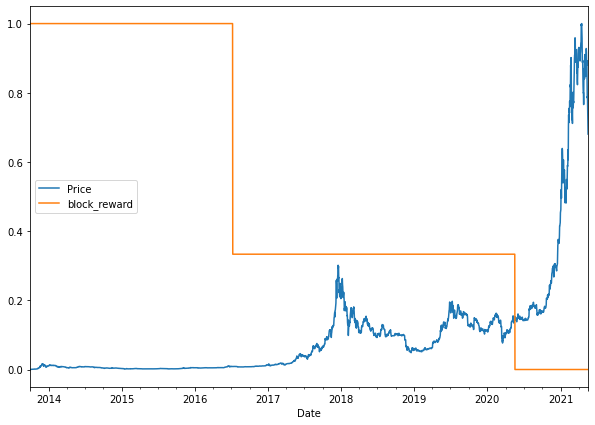

In [ ]:
# Scales are currently wrong so block_reward does not appear properly
from sklearn.preprocessing import minmax_scale
scaled_prices_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]),
                                      columns=bitcoin_prices_block.columns,
                                      index=bitcoin_prices_block.index)
scaled_prices_block_df.plot(figsize=(10, 7));

## Making a windowed dataset with pandas

Previously, we've turned our univariate time series into windowed datasets using the helper functions above.

However, since we've got multivariate data, these functions won't work.

Not to worry. We can use the `pandas.DataFrame.shift()` method to window our multivariate data.

In [ ]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Make a copy of the BTC historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


What we've just done is create a way to window our dataset directly from a pandas dataframe.

```
[0, 1, 2, 3, 4, 5, 6, block_reward] -> [7]
[1, 2, 3, 4, 5, 6, 7, block_reward] -> [8]
[2, 3, 4, 5, 6, 7, 8, block_reward] -> [9]
```

In [ ]:
# Create X (windows) and y (horizons) features
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head(5), y.head(5)

(            block_reward     Price+1     Price+2     Price+3     Price+4  \
 Date                                                                       
 2013-10-08          25.0  121.794998  120.655327  121.338661  118.674660   
 2013-10-09          25.0  123.032997  121.794998  120.655327  121.338661   
 2013-10-10          25.0  124.049004  123.032997  121.794998  120.655327   
 2013-10-11          25.0  125.961159  124.049004  123.032997  121.794998   
 2013-10-12          25.0  125.279663  125.961159  124.049004  123.032997   
 
                Price+5     Price+6     Price+7  
 Date                                            
 2013-10-08  108.584831  125.455002  123.654991  
 2013-10-09  118.674660  108.584831  125.455002  
 2013-10-10  121.338661  118.674660  108.584831  
 2013-10-11  120.655327  121.338661  118.674660  
 2013-10-12  121.794998  120.655327  121.338661  , Date
 2013-10-08    123.032997
 2013-10-09    124.049004
 2013-10-10    125.961159
 2013-10-11    125.279663

In [ ]:
# Make train and test sets using indexing
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [ ]:
# Make multivariate time series model
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_6_multivariate")

model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

history_model_6 = model_6.fit(X_train, y_train, epochs=100,
                              batch_size=128,
                              verbose=1,
                              validation_data=(X_test, y_test),
                              callbacks=[create_model_checkpoint(model_6.name)])

Epoch 1/100
18/18 [==============================] - 1s 32ms/step - loss: 1234.6804 - val_loss: 2061.9077
Epoch 2/100
18/18 [==============================] - 0s 23ms/step - loss: 351.5053 - val_loss: 1908.6733
Epoch 3/100
18/18 [==============================] - 0s 24ms/step - loss: 235.4153 - val_loss: 1329.0585
Epoch 4/100
18/18 [==============================] - 0s 23ms/step - loss: 208.6112 - val_loss: 1102.1342
Epoch 5/100
18/18 [==============================] - 0s 3ms/step - loss: 196.5770 - val_loss: 1107.8474
Epoch 6/100
18/18 [==============================] - 0s 24ms/step - loss: 187.2245 - val_loss: 1036.1720
Epoch 7/100
18/18 [==============================] - 0s 26ms/step - loss: 182.0245 - val_loss: 1019.2928
Epoch 8/100
18/18 [==============================] - 0s 24ms/step - loss: 175.7059 - val_loss: 977.8488
Epoch 9/100
18/18 [==============================] - 0s 26ms/step - loss: 170.1784 - val_loss: 954.4037
Epoch 10/100
18/18 [==============================] - 0s 

In [ ]:
# Evaluate last epoch
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 626.7440


626.7440185546875

In [ ]:
# Load in and evaluate best model epoch
model_6 = tf.keras.models.load_model("/content/model_experiments/model_6_multivariate")
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 567.8899


567.889892578125

In [ ]:
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

18/18 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8844.684, 8769.905, 9045.17 , 8747.686, 8728.429, 8772.757,
       8667.292, 8503.437, 8470.313, 8527.244], dtype=float32)>

In [ ]:
# Eval metrics
model_6_results = evaluate_preds(y_test, model_6_preds)
model_6_results

{'mae': 567.8899,
 'mse': 1164816.4,
 'rmse': 1079.2666,
 'mape': 2.5460758,
 'mase': 0.99762523}

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}


## Model 7: N-BEATS algorithm Model 

Let's now try to build the biggest time series forecasting model we've built so far.

More specifically, we're going to be replicating the algorithm in Figure 1 in the following paper: *https://arxiv.prg/pdf/1905.10437.pdf*

Why?

* This will allow us to practice replicating a paper with TF code
* We will see how to use TF layers subclassing (to make our own custom layers)
* Get experience using the Functional API to create a custom architecture
* Potentially get state of the art results on our problem



### Building and testing the N-BEATS block layer

Because the N-BEATS block layer doesn't exist in TF, we've got to create it.

To create custom layers and models in TF, we can use subclassing:
https://www.tensorflow.org/guide/keras/custom_layers_and_models

In [ ]:
# Create N-BeatBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # take care of all arguments for parent class
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers - each with "relu" act
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)
    # Output the backcast and forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

Let's test our N-BEATsBlock class.

To do so, we'll make some dummy inputs and outputs.

In [ ]:
# Setup dummy NBeatsBlock layer to represent inputs and outputs
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE + HORIZON,
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [ ]:
# Create some dummy inputs(have to same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
# Pass dummy inputs to custom Block layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)

# These are the activation outputs of the theta layer (they'll be random due to no training of model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.19014993  0.83798355 -0.3287001   0.2515993  -0.47540283 -0.7783665
 -0.5299447 ]
Forecast: -0.7554212808609009


### Preparing data for the N-BEATS algorithm using `tf.data`

To make our input data load as fast as possible, we're going to be adhering to the performant data pipeline steps in the tf.data guide.

In [ ]:
# Create N-Beats data inputs (works nicely with univariate time series)
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
# Add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price + {i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.head()

,Price,Price + 1,Price + 2,Price + 3,Price + 4,Price + 5,Price + 6,Price + 7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [ ]:
# Time to make our dataset performant using tf.data API
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Combine labels and features by zipping together -> (features, labels)
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# Batch and prefetch
BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

## Setting up Hyperparameters for N-BEATS Algorithm

The N-BEATS algorithm has a fair few parameters. Many of them can be seen in Table 18: https://arxiv.org/pdf/1905.10437.pdf

In [ ]:
# Values from N-BEATS paper
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

### Getting Ready for Residual Connections

Before we can craft our N-BEATS model, we need two layers for the residual connections (subtract and add).

The N-BEATS algorithm uses doubly residual stacking to help train its deep architecture (section 3.2 of the paper).

In [ ]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# add
added = layers.add([tensor_1, tensor_2])

# Get outputs
print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


### Building, Compiling, and Fitting the N-BEATS algorithm

1. Setup an instance of the N-BEATS block layer using `NBeatsBlock` (this'll be the initial block used for the network - the rest will be created as part of stacks).
2. Create an input layer for the N-BEATS stack (we'll be using the Keras Functional API).
3. Make the initial backcast and forecasts for the model with the layer created in (1.).
4. Use the loop to create stacks of block layers
5. Use the `NBeatsBlock` class within the for loop in (4.) to create blocks which return backcasts and block-level forecasts.
6. Create the doubly residual stacking using subtract and add layers.
7. Put the model inputs and outputs together using `tf.keras.Model()`.
8. Compile the model with MAE loss (the paper uses multiple losses, but we'll be using MAE to keep it in line with out other models) and Adam optimizer with default setting as per section 5.2 of the paper.
9. Fit the N-BEATS model for 5000 epochs. Since its fitting for so long, let's create a few callbacks:
  * EarlyStopping - we'll stop the model early if it stops improving
  * Reduce LR on Plateau - if a model stops improving, try lowering the learning rate to reduce the amount it updates its weights each time (take smaller steps towards best performance).



In [ ]:
%%time

tf.random.set_seed(42)

# 1. Setup instance of NBeatsBlocks
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlack")
# 2. Create input layer for N-BEATS layer
stack_input = layers.Input(shape=INPUT_SIZE, name="stack_input")

# 3. Make initial back-/forecasts with the layer created in 1
residuals, forecast = nbeats_block_layer(stack_input)

# 4. Create stacks of block layers
for i, _ in enumerate(range(N_STACKS-1)): # first stack created in (3.)

# 5. Use the NBeatsBlock to calculate the back- and forecasts
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) # pass in residuals

  # 6. Create the doubly residual stacking using subtract and add layers
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put together inputs and outputs
model_7 = tf.keras.Model(stack_input, forecast, name="model_7_nbeats")

# 8. Compile the model
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# 9. Fit for 5000 epochs (with specified callbacks)
history_model_7 = model_7.fit(train_dataset,
                              epochs=5000,
                              validation_data=test_dataset,
                              verbose=0,
                              callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                                patience=200,
                                                                restore_best_weights=True),
                                         tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                              patience=100,
                                                                              verbose=1)])


Epoch 812: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 912: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
CPU times: user 2min 29s, sys: 4.4 s, total: 2min 33s
Wall time: 2min 45s


In [ ]:
# Evaluate
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 17ms/step - loss: 576.2897


576.2896728515625

In [ ]:
# Make predictions
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

1/1 [==============================] - 1s 1s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8900.159, 8800.25 , 9021.633, 8809.922, 8762.25 , 8748.469,
       8698.512, 8534.868, 8485.789, 8528.673], dtype=float32)>

In [ ]:
# Evaluate model preds
model_7_results = evaluate_preds(y_test, model_7_preds)
model_7_results

{'mae': 576.2897,
 'mse': 1191686.5,
 'rmse': 1091.6439,
 'mape': 2.616034,
 'mase': 1.0123813}

In [ ]:
model_1_results

{'mae': 568.95105,
 'mse': 1171743.8,
 'rmse': 1082.4711,
 'mape': 2.5448983,
 'mase': 0.9994894}

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

### Plotting the N-BEATS Architecture we've created

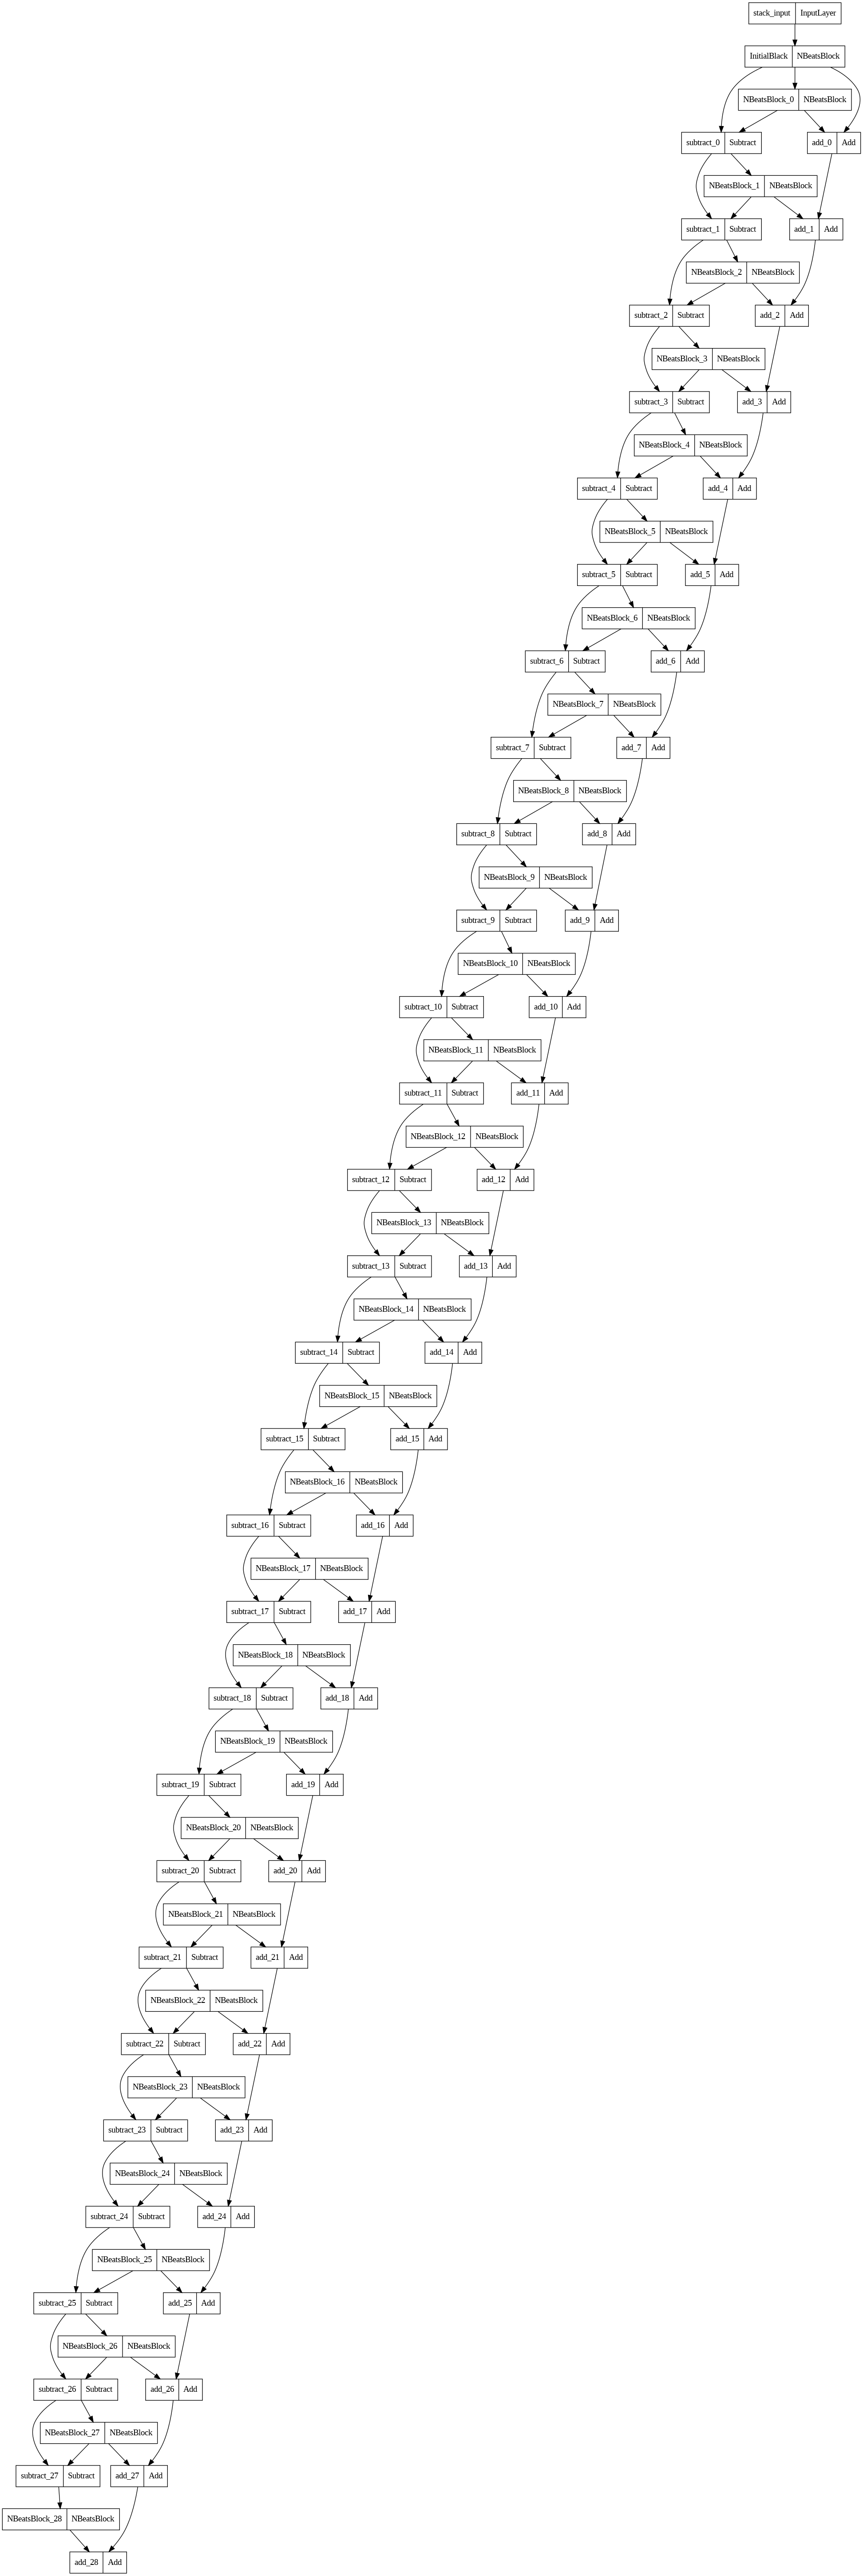

In [ ]:
# Plot the N-BEATS model and inspect (compare to the paper model's arch.)
tf.keras.utils.plot_model(model_7)

## Model 8: Creating an Ensemble (stacking different models together)

An ensemble leverages the wisdom of the crowd effect. It combines man *different* models to predict a common goal.



In [ ]:
### Constructing and fitting an ensemble of models (using different loss functions)
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=1000,
                        loss_fns=["mae", "mse", "mape"]):
  """
  Returns a list of num_iter models, each trained on MAE, MSE and MAPE loss.

  For example, if num_iter=10, a list of 30 trained models will be returned:
  10 * len(["mae", "mse", "mape"]).
  """
  # Make empty list for trained ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
          layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
          layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
          layers.Dense(HORIZON)
      ])

      # Compile simple model with current loss_fn
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])
      
      # Fit the current model (i)
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])
      # Append fitted model to list of ensemble models
      ensemble_models.append(model)

  return ensemble_models

In [ ]:
%%time
# Get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 612: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 728: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 828: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 168: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 268: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mae for 1000 epochs, model number: 1

Epoch 911: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mse for 1000 epochs, model number: 1

Epoch 409: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 509: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by redu

In [ ]:
ensemble_models

In [ ]:
len(ensemble_models)

15

## Make preditions with our ensemble model

In [ ]:
# Create a new function to make predictions from a list of trained models
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [ ]:
# Create a list of ensemble prediction
%%time
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 32ms/step
CPU times: user 567 ms, sys: 24.3 ms, total: 591 ms
Wall time: 657 ms


<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8780.306 ,  8778.966 ,  9063.68  , ..., 50521.973 , 49901.746 ,
        46467.01  ],
       [ 8765.22  ,  8741.609 ,  9052.72  , ..., 49352.395 , 48509.66  ,
        45322.12  ],
       [ 8745.424 ,  8733.034 ,  9101.386 , ..., 49267.164 , 47660.426 ,
        45370.047 ],
       ...,
       [ 8838.7705,  8748.088 ,  9044.401 , ..., 49199.02  , 49697.285 ,
        46462.098 ],
       [ 8723.777 ,  8800.912 ,  9098.231 , ..., 49565.273 , 48502.28  ,
        45030.992 ],
       [ 8816.913 ,  8761.345 ,  9040.881 , ..., 49727.47  , 48058.516 ,
        45836.293 ]], dtype=float32)>

In [ ]:
ensemble_mean = tf.reduce_mean(ensemble_preds, axis=0)
ensemble_mean

<tf.Tensor: shape=(556,), dtype=float32, numpy=
array([ 8787.089 ,  8777.584 ,  9064.96  ,  8732.518 ,  8746.268 ,
        8716.058 ,  8666.026 ,  8476.632 ,  8459.738 ,  8527.371 ,
        8202.633 ,  8106.733 ,  8049.939 ,  7629.364 ,  7273.299 ,
        7299.666 ,  7083.117 ,  7216.022 ,  7116.869 ,  7544.48  ,
        7373.796 ,  7754.622 ,  7557.5864,  7390.5103,  7321.3994,
        7315.392 ,  7208.049 ,  7392.6396,  7508.2373,  7537.4185,
        7542.4   ,  7323.3496,  7227.218 ,  7178.9634,  7192.3804,
        7233.528 ,  7081.4224,  7103.479 ,  6867.6694,  6588.7085,
        7409.1157,  7172.136 ,  7170.7285,  7259.944 ,  7270.909 ,
        7194.0967,  7218.3755,  7207.034 ,  7176.328 ,  7213.44  ,
        7306.946 ,  7383.376 ,  7241.679 ,  7166.835 ,  7157.243 ,
        6950.079 ,  7283.219 ,  7331.9614,  7364.8647,  7712.5107,
        8069.7197,  8134.516 ,  7853.5996,  8091.8374,  8096.9995,
        8168.9487,  8094.425 ,  8756.014 ,  8890.62  ,  8770.393 ,
        8938.0

In [ ]:
import numpy as np

ensemble_median = np.median(ensemble_preds, axis=0)
ensemble_median

array([ 8791.944 ,  8778.626 ,  9060.633 ,  8719.428 ,  8738.092 ,
        8720.733 ,  8673.861 ,  8478.887 ,  8455.274 ,  8527.079 ,
        8203.047 ,  8102.631 ,  8046.2007,  7626.327 ,  7261.0303,
        7288.685 ,  7072.0117,  7218.4175,  7116.0063,  7564.651 ,
        7385.017 ,  7754.901 ,  7564.293 ,  7383.281 ,  7322.7095,
        7311.715 ,  7207.3105,  7394.137 ,  7501.015 ,  7536.2427,
        7542.7764,  7328.8325,  7228.761 ,  7181.7163,  7193.904 ,
        7240.518 ,  7081.141 ,  7100.6406,  6869.804 ,  6586.6997,
        7404.8867,  7166.123 ,  7186.8916,  7268.2773,  7247.459 ,
        7204.504 ,  7215.771 ,  7202.3105,  7176.164 ,  7206.481 ,
        7304.8867,  7382.019 ,  7240.6304,  7164.8696,  7155.3965,
        6949.83  ,  7282.4683,  7324.1157,  7359.9897,  7726.276 ,
        8062.651 ,  8134.1294,  7851.119 ,  8094.2983,  8094.441 ,
        8171.5986,  8102.9126,  8765.822 ,  8892.476 ,  8764.912 ,
        8950.541 ,  8965.172 ,  8664.537 ,  8630.657 ,  8692.9

Our ensemble preds come out int multiple dimensions, but to combine into **point predictions** we can leverage the mean of all of the predictions or the median.

In [ ]:
ensemble_results = evaluate_preds(y_test, ensemble_preds)
ensemble_results

{'mae': 577.9384,
 'mse': 1178117.2,
 'rmse': 1085.2632,
 'mape': 2.6454694,
 'mase': 1.0152777}

In [ ]:
ensemble_results = evaluate_preds(y_test, ensemble_mean)
ensemble_results

{'mae': 566.6724,
 'mse': 1144048.9,
 'rmse': 1069.6022,
 'mape': 2.579099,
 'mase': 0.9954865}

In [ ]:
ensemble_results = evaluate_preds(y_test, ensemble_median)
ensemble_results

{'mae': 567.1592,
 'mse': 1144727.4,
 'rmse': 1069.9193,
 'mape': 2.584029,
 'mase': 0.9963416}

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

>**Note:** Ensemble models have a tradeoff to consider: they often perform well over many other models or architectures (see Kaggle for some examples), but they also often are more complicated and take extra time to design and train.

## Plotting the prediction intervals (uncertainty estimates)

So far, we've been making point predictions with out models.

E.g., horizon = 1, our model predicts tomorrow's price of BTC will be $50,000 USD.

Wouldn't it be helpful if we knew a range of where that prediction came from?

Instead of 50,000 USD on the dot, how about 48,000 to 52,000 USD?

To get the 95% confidence prediction intervals for a deep learning model is the bootstrap method:

1. Take the predictions from a number of randomly initialized models (we've got this thanks to our ensemble models)
2. Measure the standard deviation of the predictions
3. Multiply the standard deviation by 1.96 (assuming the distribution is Gaussian/Normal, 95% of observations fall within 1.96 standard deviations of the mean
4. To get the prediction interval upper and lower bounds, add and subtract the value obtained in (3.) to the mean/median of the predictions made in (1.)

* See Wikipedia article on the number 1.96 in Gaussian/Normal distributions for more info.

In [ ]:
# Find the upper and lower bounds of ensemble predictions
def get_upper_lower(preds): # 1. Take preds from number of randomly init'd models

  # 2. Measure std of the predictions
  std = tf.math.reduce_std(preds, axis=0)

  # 3. Multiply the standard deviation by 1.96
  interval = 1.96 * std

  # 4. Get prediction interval upper and lower bounds
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval

  return lower, upper

In [ ]:
# Get the upper and lower bounds of the 95% percent pred interval
lower, upper = get_upper_lower(ensemble_preds)

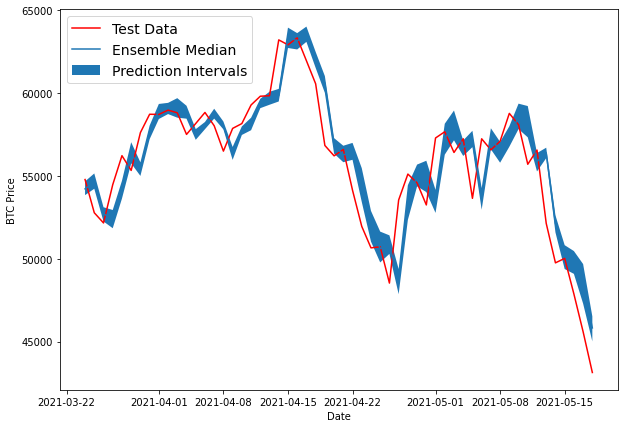

In [ ]:
# Get the median/mean values of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

# Plot the median of our ensemble_preds along with the prediction intervals
offset = 500
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "r", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label="Prediction Intervals") # plot upper and lower bounds
plt.legend(loc="upper left", fontsize=14)

So far, all of our models' predictions have been lagging behind the test data... as if they're replicating what the naive model does by just predicting the previous timestep as the next timestep...

>**Note**: These prediction intervals are estimates themselves. And they have been created with the assumption that ourmodel's data is from a normal distribution.

## Model 9: Train a model on the full historical data to make predictions into the future

So far, all of our models have predicted on the test dataset. However, this is only a pseudo-future.

Let's not build a model which is capable of predicting into the future!

In [ ]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
bitcoin_prices_windowed.tail()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679
2021-05-17,45604.615754,6.25,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426
2021-05-18,43144.471291,6.25,45604.615754,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651


In [ ]:
# Train model on entire data to make predictions for the next day
X_all = bitcoin_prices_windowed.dropna().drop(["Price", "block_reward"], axis=1).to_numpy()

# Get labels
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

len(X_all), len(y_all)

(2780, 2780)

In [ ]:
X_all[:5], y_all[:5]

(array([[121.795  , 120.65533, 121.33866, 118.67466, 108.58483, 125.455  ,
         123.65499],
        [123.033  , 121.795  , 120.65533, 121.33866, 118.67466, 108.58483,
         125.455  ],
        [124.049  , 123.033  , 121.795  , 120.65533, 121.33866, 118.67466,
         108.58483],
        [125.96116, 124.049  , 123.033  , 121.795  , 120.65533, 121.33866,
         118.67466],
        [125.27966, 125.96116, 124.049  , 123.033  , 121.795  , 120.65533,
         121.33866]]),
 array([123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ]))

In [ ]:
# Turn data into efficient running tensors
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# Combine features and labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

BATCH_SIZE = 1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [ ]:
model_9 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_9_future_model")

# Compile
model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

# Fit model on all of the data to make future forecasts
model_9.fit(dataset_all,
            epochs=100,
            verbose=True)

Epoch 1/100
3/3 [==============================] - 0s 5ms/step - loss: 2945.7742
Epoch 2/100
3/3 [==============================] - 0s 5ms/step - loss: 658.7231
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 1592.8578
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 1583.3853
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 660.8655
Epoch 6/100
3/3 [==============================] - 0s 4ms/step - loss: 687.8099
Epoch 7/100
3/3 [==============================] - 0s 4ms/step - loss: 926.3991
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: 549.6382
Epoch 9/100
3/3 [==============================] - 0s 4ms/step - loss: 460.8010
Epoch 10/100
3/3 [==============================] - 0s 5ms/step - loss: 589.8773
Epoch 11/100
3/3 [==============================] - 0s 4ms/step - loss: 389.4635
Epoch 12/100
3/3 [==============================] - 0s 5ms/step - loss: 457.9047
Epoch 13/100
3/3 [================

### Make predictions into the future

In [ ]:
# How many timesteps to predict into the future?
INTO_FUTURE = 14

To make predictions into the future we want a function that:

1. Takes as inputs:
  * a list of values (BTC historical data)
  * a trained model (such as `model_9`)
  * a window into the future to predict (our `INTO_FUTURE` variable)
  * the window size a model was trained on (`WINDOW_SIZE`) - the model can only predict on the same kind of data it was trained on
  2. Creates an empty list for future forecasts (this will be returned at the end of the end, when it's full of predictions) and extracts the last `WINDOW_SIZE` values from the input values
  3. Loop `INTO_FUTURE` times making a prediction on `WINDOW_SIZE` sequences which update to remove the first value and append the latest prediction

In [ ]:
# 1. Create function to make predictions into the future
def make_future_forecasts(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Make future forecasts into future steps after values ends.

  Returns future forecasts as a list of floats.
  """
  # 2. Create an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:]

  # 3. Make INTO_FUTURE number of predictions, altering the data thats predicted on each time
  for _ in range(INTO_FUTURE):
    # Predict on the last window then append it again, again, again...
    # (our model will eventually begin to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on:\n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    # Append prediction to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())

    # Update last window with new pred and get WINDOW_SIZE most recent preds
    # (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]

  return future_forecast

In [ ]:
# Make forecasts into the future
future_forecast = make_future_forecasts(y_all,
                                        model_9,
                                        INTO_FUTURE,
                                        WINDOW_SIZE)

1/1 [==============================] - 0s 38ms/step
Predicting on:
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 55844.31640625

1/1 [==============================] - 0s 16ms/step
Predicting on:
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55844.31640625] -> Prediction: 50055.8203125

1/1 [==============================] - 0s 14ms/step
Predicting on:
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55844.31640625 50055.8203125 ] -> Prediction: 49745.97265625

1/1 [==============================] - 0s 14ms/step
Predicting on:
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55844.31640625 50055.8203125  49745.97265625] -> Prediction: 48822.53515625

1/1 [==============================] - 0s 13ms/step
Predicting on:
 [47885.62525472 45604.61575361 43144.47129086 55844.31640625
 50055.8203125  49745.97265625 48822.5351562

In [ ]:
bitcoin_prices_windowed.tail()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679
2021-05-17,45604.615754,6.25,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426
2021-05-18,43144.471291,6.25,45604.615754,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651


### Plot Future Forecasts

In [ ]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values ranging from start_date to start_date+into_future.
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]")

In [ ]:
# Last timestep of timesteps(currently in np.datetime64 format)
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [ ]:
# Get next two week of timesteps
next_time_steps = get_future_dates(start_date=last_timestep,
                                  into_future=INTO_FUTURE)
next_time_steps, next_time_steps.shape

(array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
        '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
        '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
        '2021-05-31', '2021-06-01'], dtype='datetime64[D]'), (14,))

In [ ]:
# Insert last timestep/final price into next timestep and future forecasts
# to prevent disjointed graph
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast, next_time_steps.shape, future_forecast.shape

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 55844.316, 50055.82 , 49745.973, 48822.535, 47370.75 ,
        45662.97 , 46402.984, 54459.953, 48835.38 , 49488.67 , 47904.562,
        47223.242, 46253.19 , 48420.52 ], dtype=float32),
 (15,),
 (15,))

In [ ]:
last_timestep

Timestamp('2021-05-18 00:00:00')

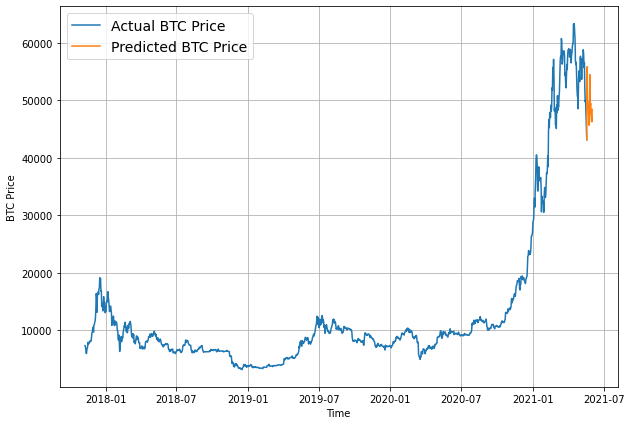

In [ ]:
# Plot futre price predictions of Bitcoin
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_prices.index,
                 btc_price,
                 start=1500,
                 format="-",
                 label="Actual BTC Price")
plot_time_series(next_time_steps,
                 future_forecast, 
                 format="-",
                 label="Predicted BTC Price")

## Model 10: The Turkey Problem (Why Forecasting is BS)

In [ ]:
# Let's introduce a turkey problem to our BTC data (price of BTC falls 100x in a day)
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1]/100

In [ ]:
# Manufacturing an extra price on the end (to showcase a turkey problem)
btc_price_turkey[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

In [ ]:
# get timesteps
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

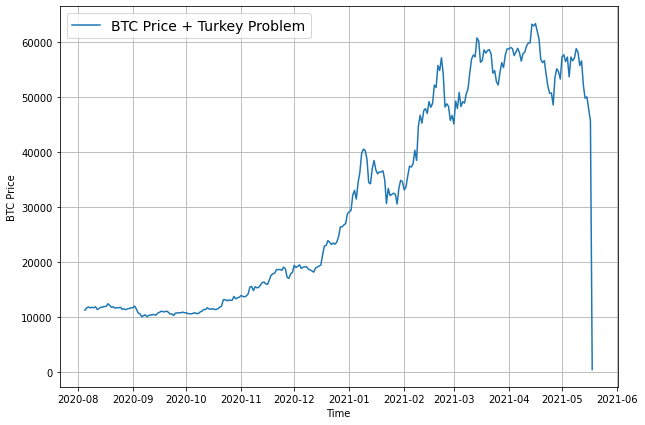

In [ ]:
plt.figure(figsize=(10, 7))
plot_time_series(btc_timesteps_turkey,
                 btc_price_turkey,
                 format="-",
                 label="BTC Price + Turkey Problem",
                 start=2500)

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Create train and test turkey sets
full_windows, full_labels = make_windows(np.array(btc_price_turkey),
                                         window_size=WINDOW_SIZE,
                                         horizon=HORIZON)
X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)
len(X_train), len(X_test), len(y_train), len(y_test)

Window indexes:
 (array([[   0,    1,    2, ...,    5,    6,    7],
       [   1,    2,    3, ...,    6,    7,    8],
       [   2,    3,    4, ...,    7,    8,    9],
       ...,
       [2777, 2778, 2779, ..., 2782, 2783, 2784],
       [2778, 2779, 2780, ..., 2783, 2784, 2785],
       [2779, 2780, 2781, ..., 2784, 2785, 2786]]), (2780, 8))


(2224, 556, 2224, 556)

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tf.random.set_seed(42)

model_10_turkey = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear")
], name="model_10_dense")

model_10_turkey.compile(loss=tf.keras.losses.mae,
                 optimizer=tf.keras.optimizers.Adam())

history_model_10_turkey = model_10_turkey.fit(X_train, y_train,
                                       epochs=100,
                                       verbose=False,
                                       batch_size=128,
                                       validation_data=(X_test, y_test),
                                       callbacks=[create_model_checkpoint(model_10_turkey.name)])

In [ ]:
# Evaluate
model_10_turkey.evaluate(X_test, y_test)

18/18 [==============================] - 0s 3ms/step - loss: 662.7978


662.7977905273438

In [ ]:
# Load best
model_10_turkey = tf.keras.models.load_model("/content/model_experiments/model_10_dense")
model_10_turkey.evaluate(X_test, y_test)

18/18 [==============================] - 0s 3ms/step - loss: 645.7731


645.7730712890625

In [ ]:
# Make predictions
turkey_preds = make_preds(model_10_turkey, X_test)
turkey_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8861.71 , 8769.887, 9015.711, 8795.519, 8723.811, 8730.111,
       8691.952, 8502.054, 8460.961, 8516.548], dtype=float32)>

In [ ]:
# Evaluate
turkey_results = evaluate_preds(y_test, turkey_preds)
turkey_results

{'mae': 17125.525,
 'mse': 614164860.0,
 'rmse': 23707.303,
 'mape': 121.308525,
 'mase': 26.501806}

In [ ]:
model_1_results, naive_results

({'mae': 568.95105,
  'mse': 1171743.8,
  'rmse': 1082.4711,
  'mape': 2.5448983,
  'mase': 0.9994894},
 {'mae': 567.9802,
  'mse': 1147547.0,
  'rmse': 1071.2362,
  'mape': 2.516525,
  'mase': 0.99957})

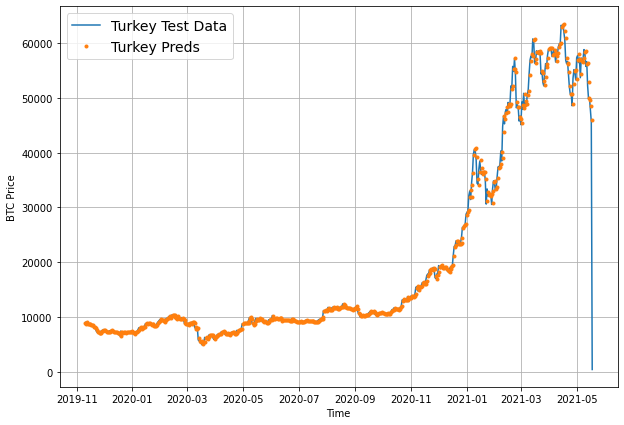

In [ ]:
plt.figure(figsize=(10, 7))
offset=0
plot_time_series(timesteps = btc_timesteps_turkey[-len(X_test):],
                 values = btc_price_turkey[-len(y_test):],
                 format="-",
                 label="Turkey Test Data", 
                 start=offset)
plot_time_series(timesteps = btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds,
                 label="Turkey Preds",
                 start=offset)

## Comparing all of our models' results

In [ ]:
# Compare all of our model results (w = window, h = horizon)

all_model_results = pd.DataFrame({"naive_model": naive_results,
                                  "model_1_dense_w7_h1": model_1_results,
                                  "model_2_dense_w30_h1": model_2_results,
                                  "model_3_dense_w30_h7": model_3_results,
                                  "model_4_Conv1D": model_4_results,
                                  "model_5_LSTM": model_5_results,
                                  "model_6_multivariate": model_6_results,
                                  "model_7_NBEATS": model_7_results,
                                  "model_8_ensemble": ensemble_results,
                                  "model_10_turkey": turkey_results}).T
all_model_results

,mae,mse,rmse,mape,mase
naive_model,567.980225,1.147547e+06,1071.236206,2.516525,0.999570
model_1_dense_w7_h1,568.951050,1.171744e+06,1082.471069,2.544898,0.999489
model_2_dense_w30_h1,605.874084,1.273361e+06,1128.432861,2.726445,1.059074
model_3_dense_w30_h7,1237.353760,5.384458e+06,1421.608643,5.564616,2.201802
model_4_Conv1D,570.828369,1.176671e+06,1084.744751,2.559336,1.002787
model_5_LSTM,594.602966,1.267232e+06,1125.713867,2.671757,1.044553
model_6_multivariate,567.889893,1.164816e+06,1079.266602,2.546076,0.997625
model_7_NBEATS,576.289673,1.191686e+06,1091.643921,2.616034,1.012381
model_8_ensemble,567.159180,1.144727e+06,1069.919312,2.584029,0.996342
model_10_turkey,17125.525391,6.141649e+08,23707.302734,121.308525,26.501806


*Model 9 is missing because it attempted to predict on the future, unlike the rest of our models...*

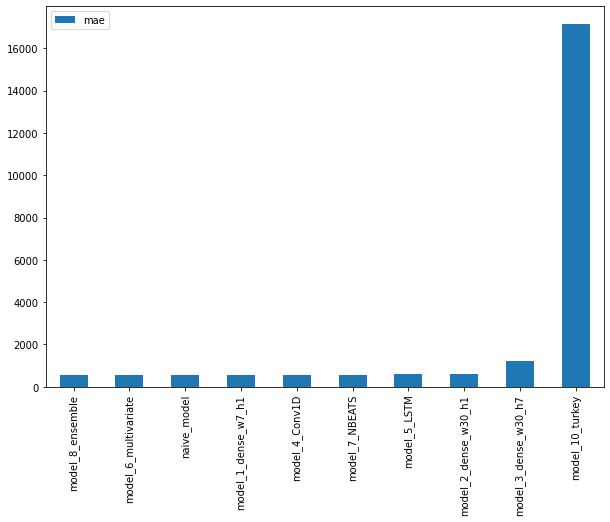

In [ ]:
# Sort model results by MAE and plot
all_model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar");